# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-raw-SOI-data-against-raw-case-count-data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Check raw SOI data against raw case count data</a></span></li><li><span><a href="#Plot-national-SOI" data-toc-modified-id="Plot-national-SOI-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Plot national SOI</a></span></li><li><span><a href="#Plot-cases-under-investigation-by-state" data-toc-modified-id="Plot-cases-under-investigation-by-state-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Plot cases under investigation by state</a></span></li></ul></li><li><span><a href="#Local-cases---speculative" data-toc-modified-id="Local-cases---speculative-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Local cases - speculative</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-local-tranmission" data-toc-modified-id="Create-dataframe-of-local-tranmission-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create dataframe of local tranmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li><li><span><a href="#Current-outbreaks" data-toc-modified-id="Current-outbreaks-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Current outbreaks</a></span></li><li><span><a href="#Historic-Outbreaks" data-toc-modified-id="Historic-Outbreaks-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Historic Outbreaks</a></span></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_t$" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_t$-8.8"><span class="toc-item-num">8.8&nbsp;&nbsp;</span>Model for the effective reproduction number $R_t$</a></span></li><li><span><a href="#Comparative-$R_t$-and-GF" data-toc-modified-id="Comparative-$R_t$-and-GF-8.9"><span class="toc-item-num">8.9&nbsp;&nbsp;</span>Comparative $R_t$ and GF</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-8.10"><span class="toc-item-num">8.10&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Hospitalised</a></span></li><li><span><a href="#Explore-cases-to-deaths-curve" data-toc-modified-id="Explore-cases-to-deaths-curve-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Explore cases to deaths curve</a></span><ul class="toc-item"><li><span><a href="#supporting-functions" data-toc-modified-id="supporting-functions-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>supporting functions</a></span></li><li><span><a href="#Establish-historical-baseline" data-toc-modified-id="Establish-historical-baseline-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Establish historical baseline</a></span></li><li><span><a href="#Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak" data-toc-modified-id="Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Use above baseline to look at the recent Sydney Delta outbreak</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

#pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  

# used in charts of the recent period
RECENT = 92 # days

### Warnings

In [3]:
warning_count = 0
warnings = []

def warn(message: str) -> None:
    if message:
        print(message)
        warnings.append(message)
    global warning_count
    warning_count += 1
    return None

def print_warnings() -> None:
    if warning_count == 0:
        return None
    
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')

    [print(m) for m in warnings]
    return None

### State populations and per capita calculations

In [4]:
# Constants across all tests
state_pop = {
    # source: https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release
    # population at 30 June 2020
    'NSW':        8_164_100,
    'Victoria':   6_694_900,
    'Queensland': 5_174_400,
    'SA':         1_769_300,
    'WA':         2_661_900,
    'Tasmania':     540_600,
    'ACT':          431_100,
    'NT':           246_000,
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor

Australian population: 25,682,300


## Get the data

In [5]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)
        
    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f'Warning: There are records into the future?')
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [6]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [7]:
# Quick peak at the data columns
raw_json_data.columns

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT'],
      dtype='object')

In [8]:
# Quick look at the categorising column
raw_json_data.NAME.unique()

array(['Australia', 'NSW', 'Victoria', 'Queensland', 'WA', 'SA',
       'Tasmania', 'ACT', 'NT'], dtype=object)

## Capture cumulative and daily data for selected columns

In [9]:
selected_cols = {
    # column name      # plain English for charts
    'CASE_CNT':        'cases',
    'DEATH_CNT':       'deaths',
    'TEST_CNT':        'tests',
    'VACC_DOSE_CNT':   'vacc doses',
    #'VACC_FIRST_DOSE_CNT': 'first doses',
    #'VACC_PEOPLE_CNT': 'vacc people',
}

In [10]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = (
        raw_json_data
        .pivot(index='REPORT_DATE', columns='NAME', values=item)
        .sort_index(ascending=True)
    )
    
    # if state totals have NaNs, change a non-NaN 'Australia' to NaN
    states = table.columns.to_list()
    if 'Australia' in states:
        states.remove('Australia')
        odd_rows = table[states].isna().any(axis=1) & table['Australia'].notna()
        if odd_rows.any():
            fix_these_rows = odd_rows[odd_rows].index
            #warn(f'Nullifying these Australian totals in {item} '
            #     f'{fix_these_rows.to_list()}')
            table.loc[fix_these_rows, 'Australia'] = np.nan
    
    # drop all-NaN rows
    missing_rows = table.isna().all(axis=1)
    if missing_rows.any():
        drop_these_rows = missing_rows[missing_rows].index
        #warn(f'Dropping all-NaN rows from {item}: {drop_these_rows.to_list()}')
        table.drop(drop_these_rows, inplace=True)
    
    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'We are missing the latest {item} '
             f'for {", ".join(situation[situation].index.to_list())}')

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(f'Lastest value less than its predecessor in {item} '
             f'for {", ".join(not_max[not_max].index.to_list())}')

    return (table)

In [11]:
def get_item(item, raw_json_data):
    """Return a DataFrame dates-x-states for item.
       Ensure early NaNs are mapped to zero.
       But keep any NaNs at the end of the table."""
    
    
    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()
    
    data = (
        raw
        .ffill()
        .fillna(0)
        .where(~end_nan_mask, other=np.nan)
    )

    return data

In [12]:
cum_u = {}
daily_u = {}
daily_c = {}
cum_c = {}

for item in selected_cols.keys():
    # get the raw cumulative data
    cum_u[item] = get_item(item, raw_json_data)

    # adjusted daily and cumulative data (for corrections)
    daily_u[item], daily_c[item], cum_c[item] = (
        ps.dataframe_correction(cum_u[item], verbose=False)
    )

We are missing the latest CASE_CNT for Australia, SA, WA
We are missing the latest DEATH_CNT for Australia, SA, WA
We are missing the latest TEST_CNT for ACT, Australia, SA, WA


In [13]:
# Check - raw daily new cases  
cum_u['CASE_CNT'].diff()[-5:]

NAME          ACT  Australia    NSW   NT  Queensland   SA  Tasmania  Victoria  \
REPORT_DATE                                                                     
2021-08-19   16.0      748.0  674.0  0.0         0.0  1.0       0.0      57.0   
2021-08-20   11.0      706.0  636.0  0.0         1.0  0.0       0.0      57.0   
2021-08-21    8.0      891.0  820.0  0.0         2.0  0.0       0.0      61.0   
2021-08-22   19.0      909.0  824.0  0.0         0.0  0.0       0.0      66.0   
2021-08-23   16.0        NaN  803.0  0.0         2.0  NaN       0.0      71.0   

NAME          WA  
REPORT_DATE       
2021-08-19   0.0  
2021-08-20   1.0  
2021-08-21   0.0  
2021-08-22   0.0  
2021-08-23   NaN

## Weekly charts

In [14]:
# Check - cooked daily new cases  
daily_c['CASE_CNT'][-5:]

ACT  Australia    NSW   NT  Queensland   SA  Tasmania  Victoria  \
REPORT_DATE                                                                     
2021-08-19   16.0      748.0  674.0  0.0         0.0  1.0       0.0      57.0   
2021-08-20   11.0      706.0  636.0  0.0         1.0  0.0       0.0      57.0   
2021-08-21    8.0      891.0  820.0  0.0         2.0  0.0       0.0      61.0   
2021-08-22   19.0      909.0  824.0  0.0         0.0  0.0       0.0      66.0   
2021-08-23   16.0        NaN  803.0  0.0         2.0  NaN       0.0      71.0   

              WA  
REPORT_DATE       
2021-08-19   0.0  
2021-08-20   1.0  
2021-08-21   0.0  
2021-08-22   0.0  
2021-08-23   NaN

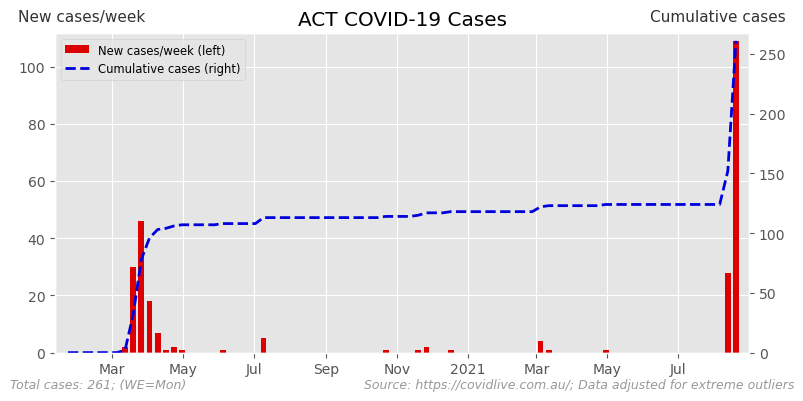

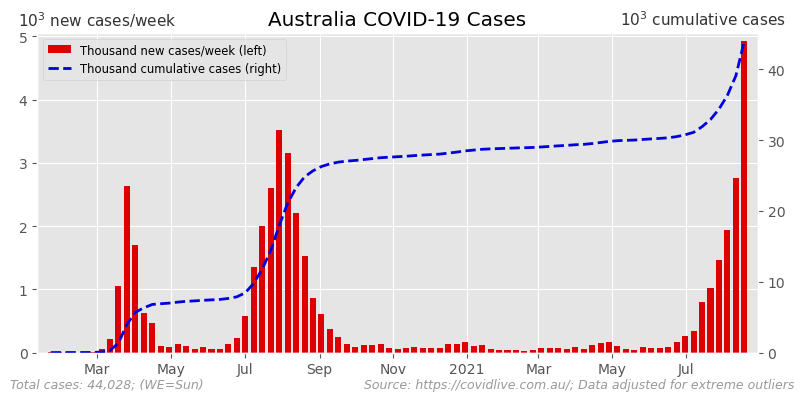

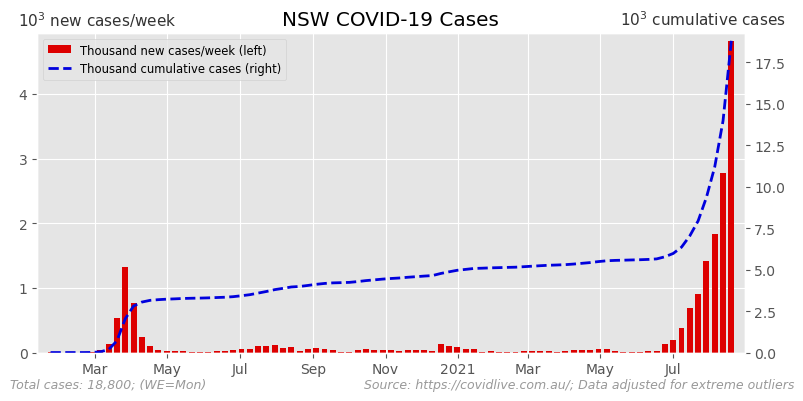

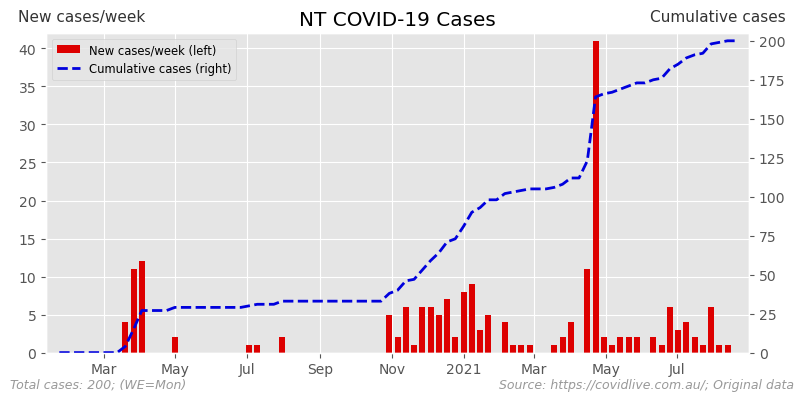

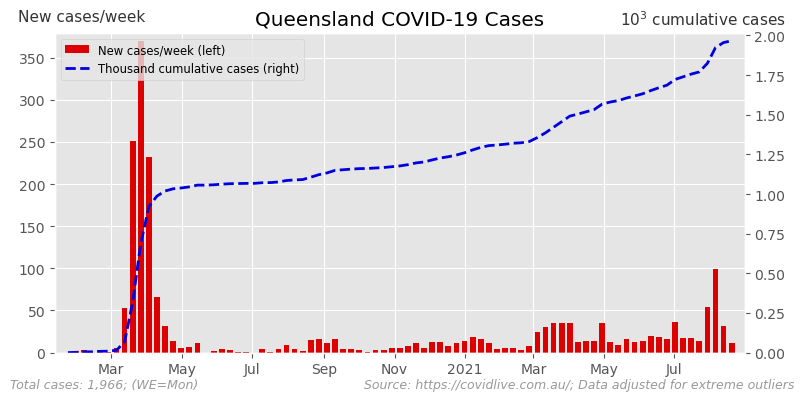

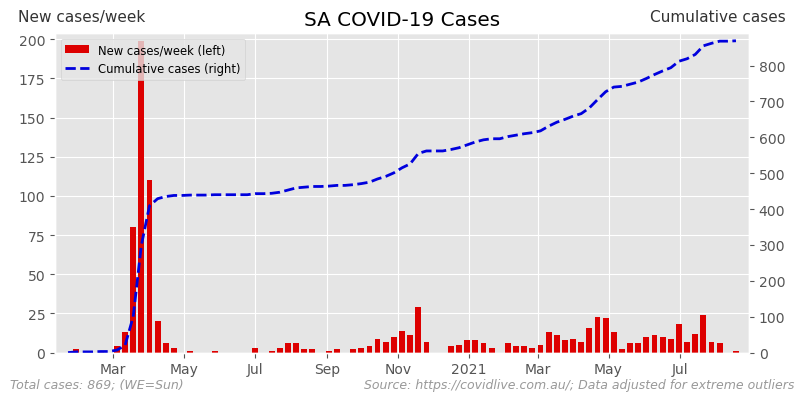

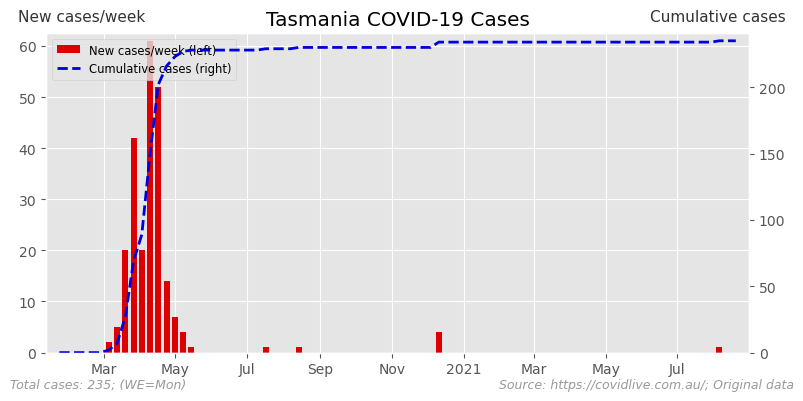

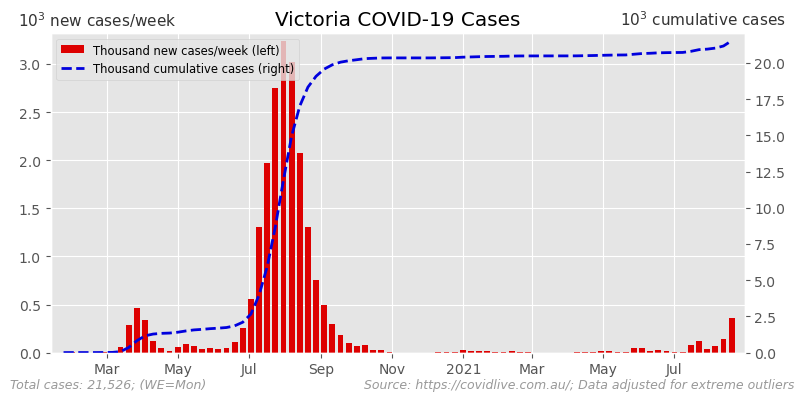

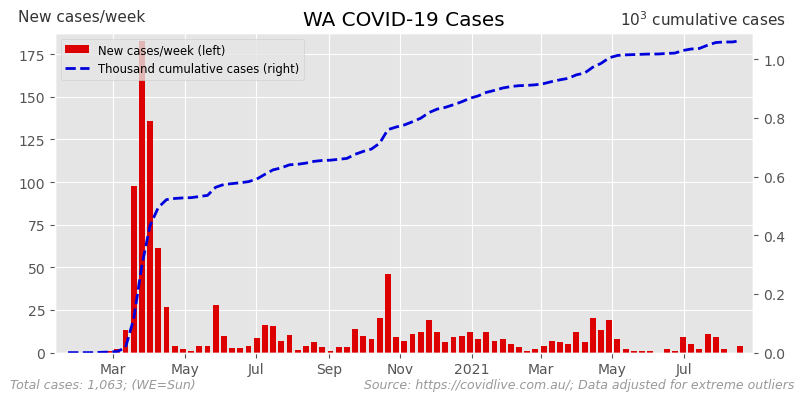

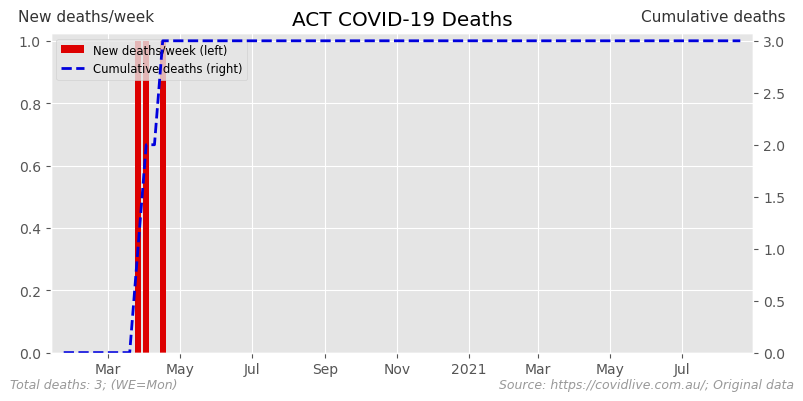

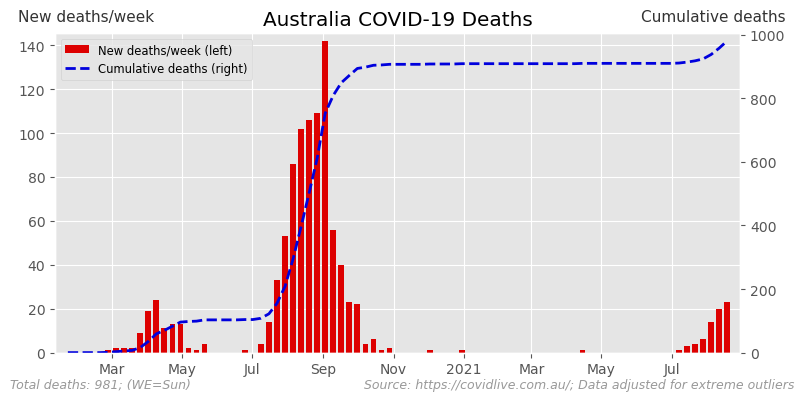

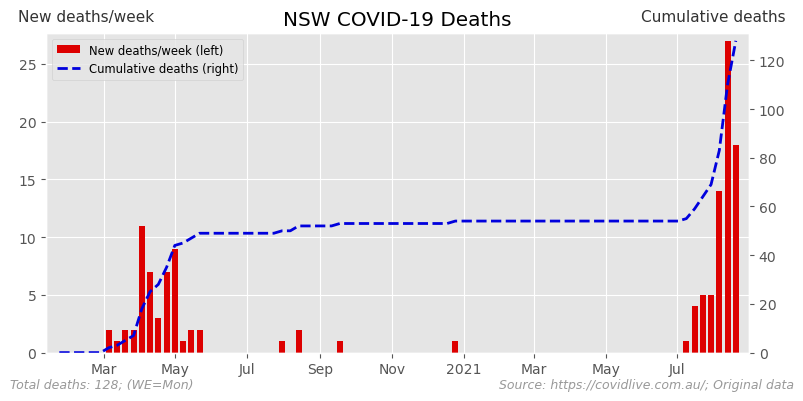

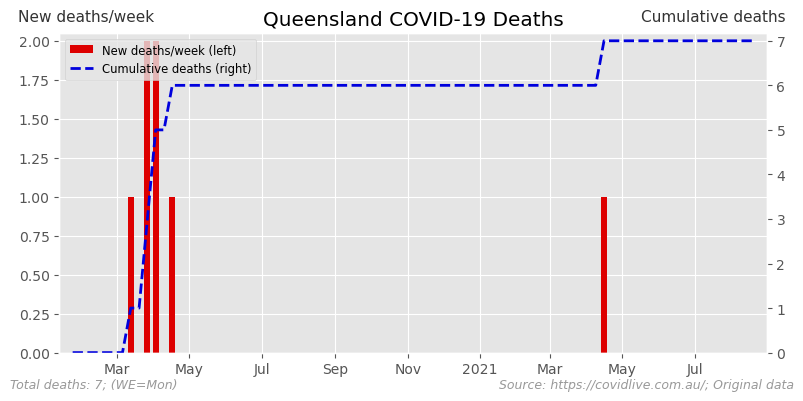

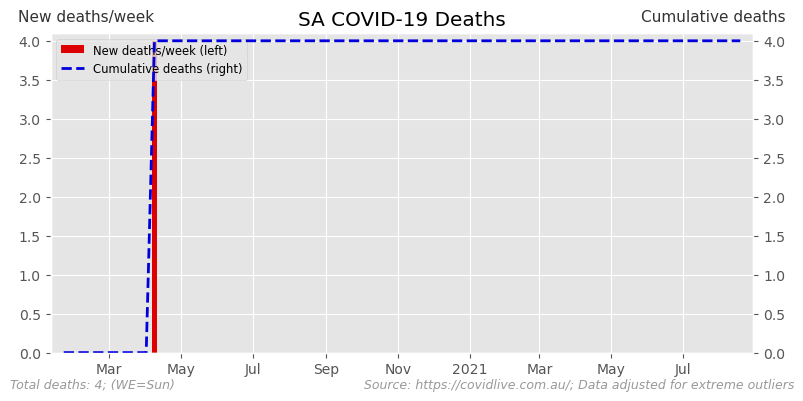

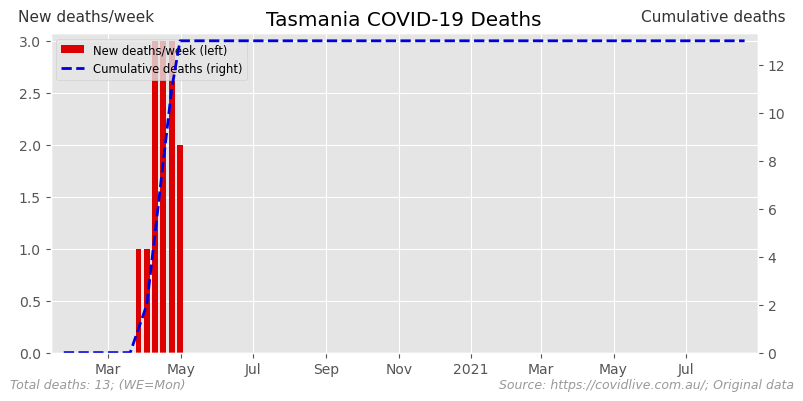

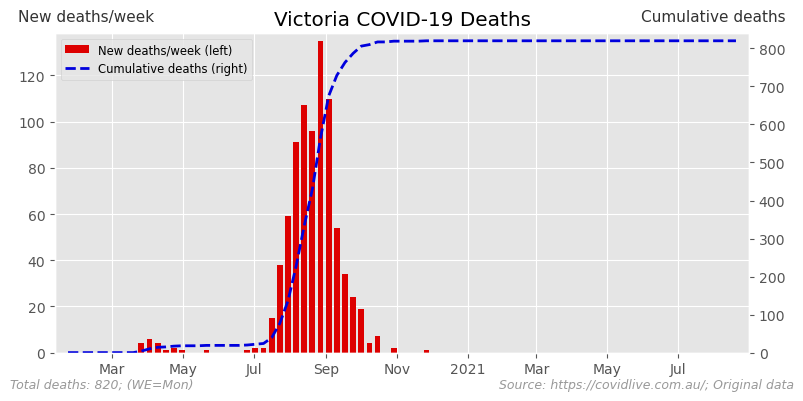

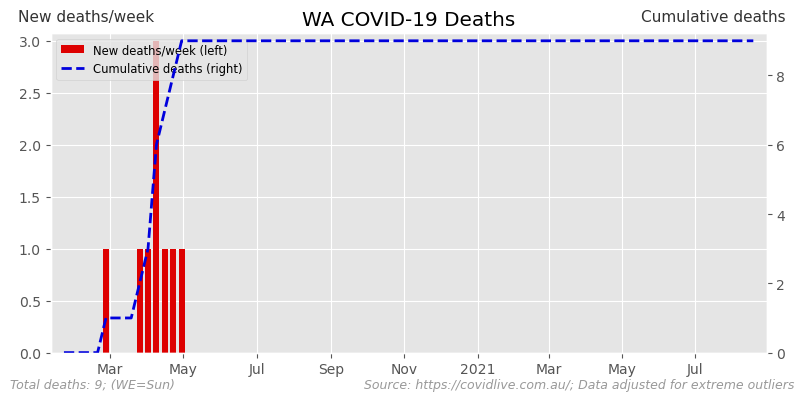

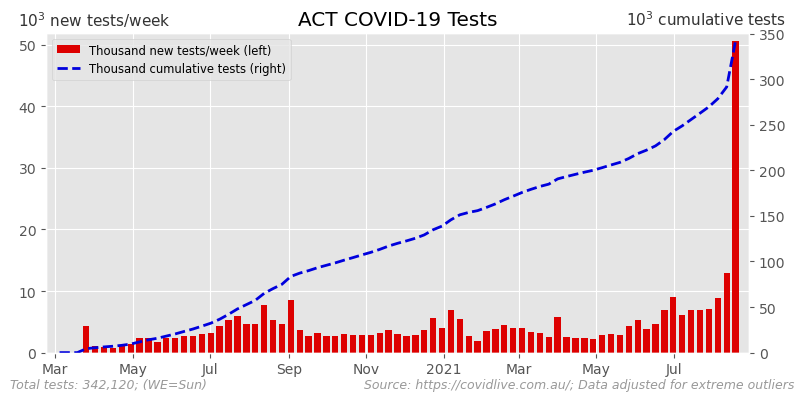

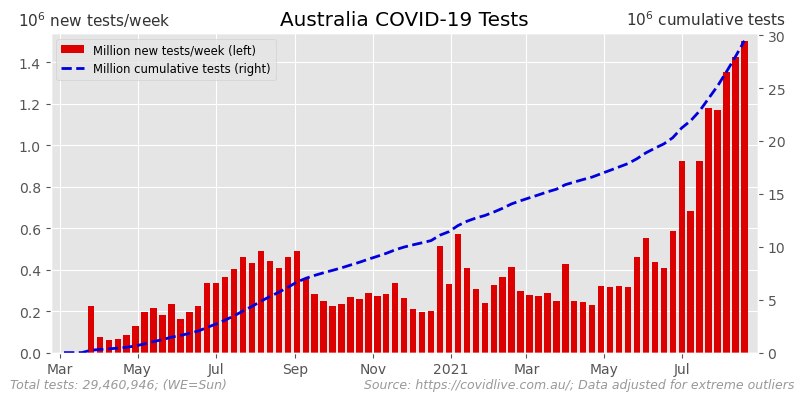

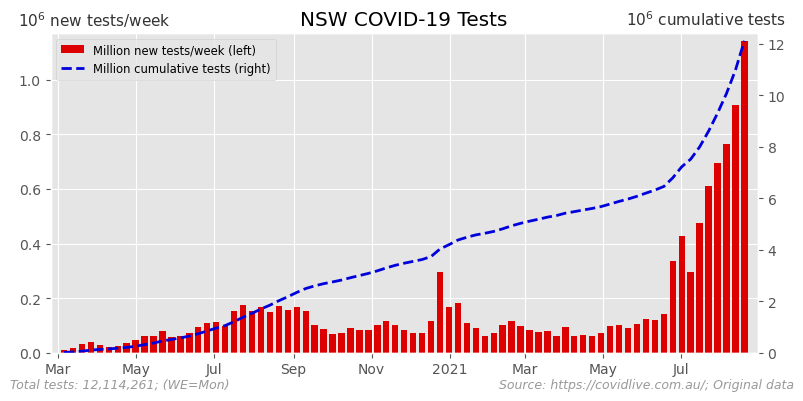

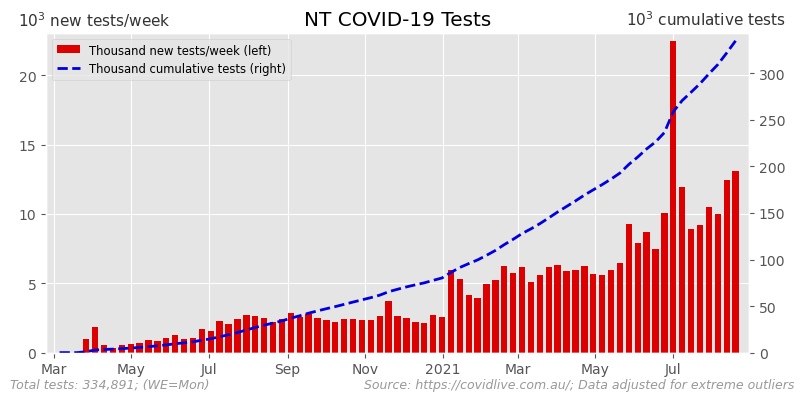

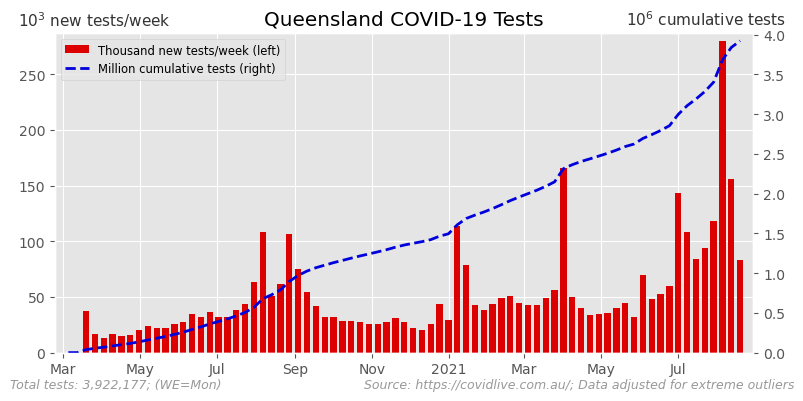

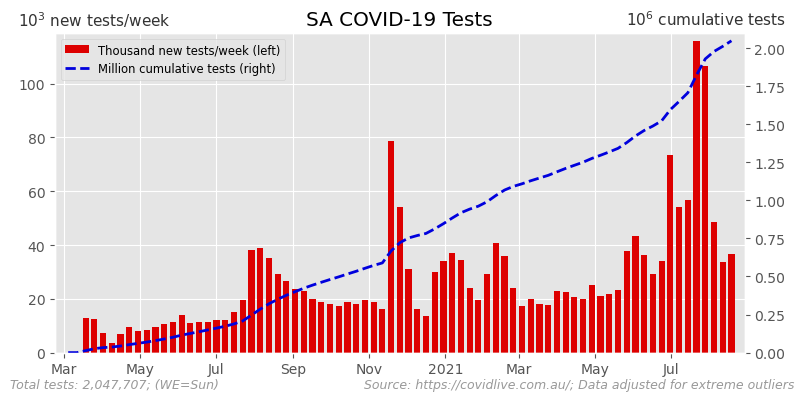

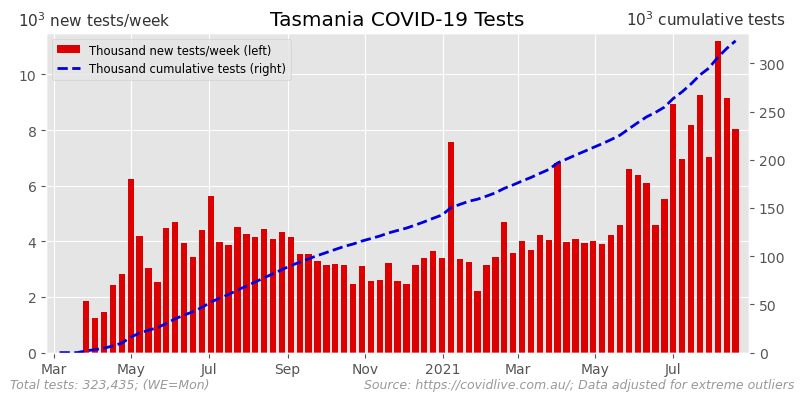

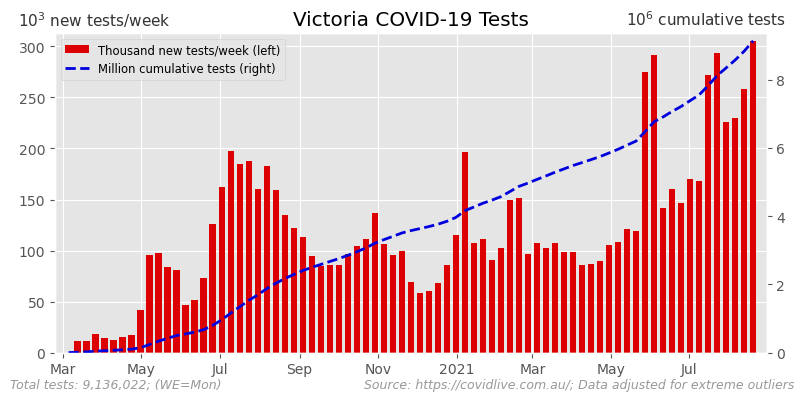

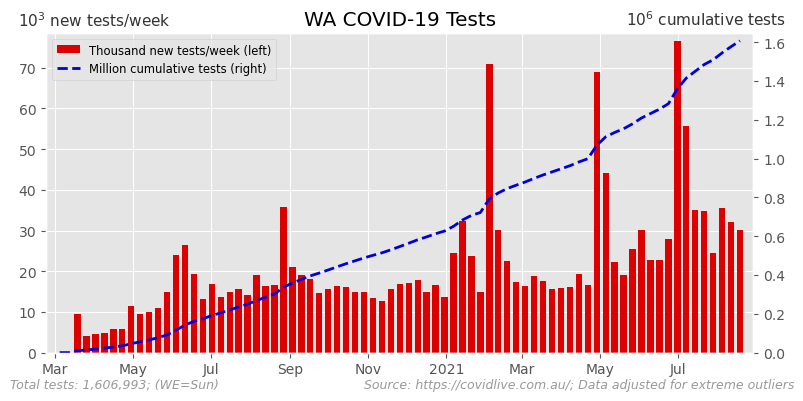

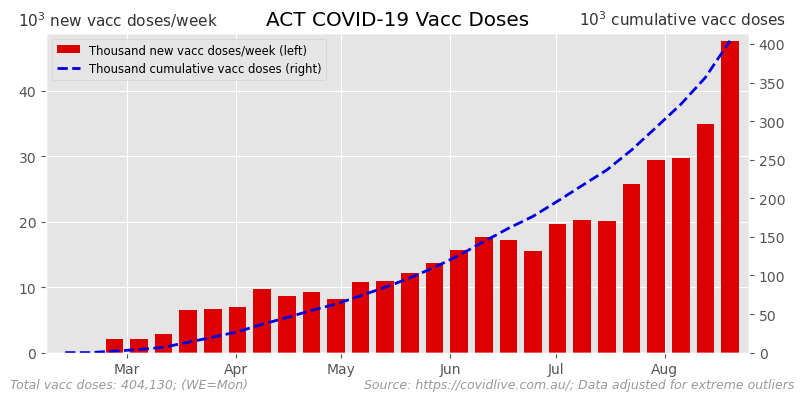

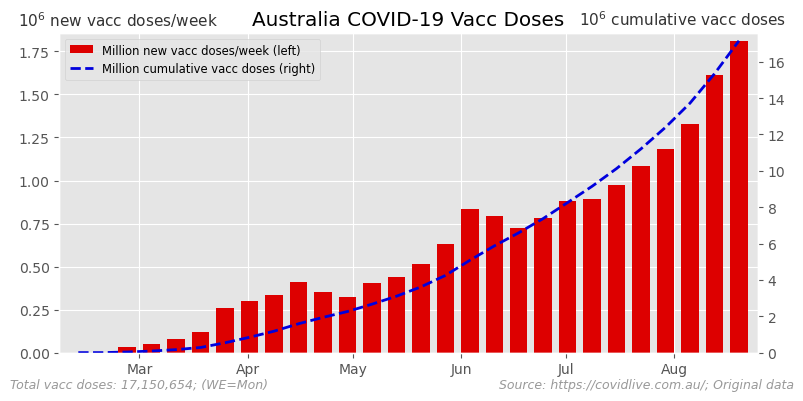

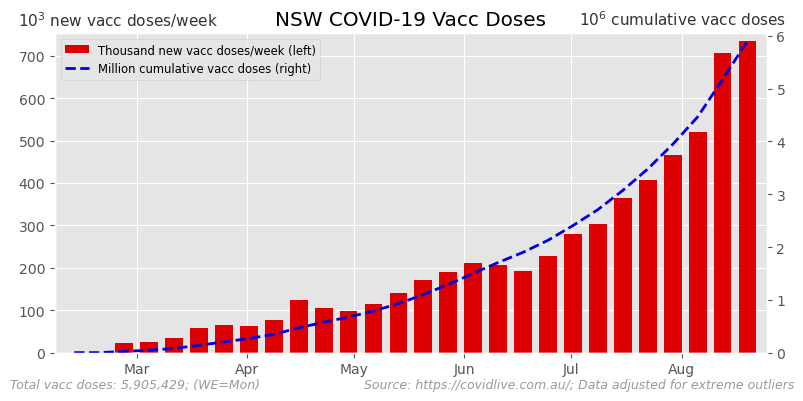

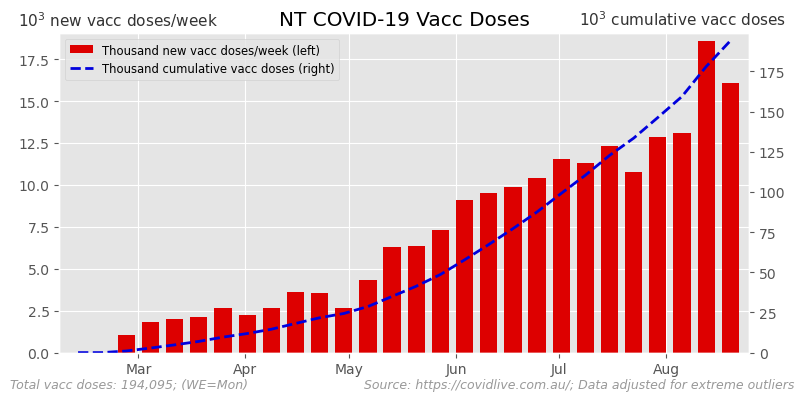

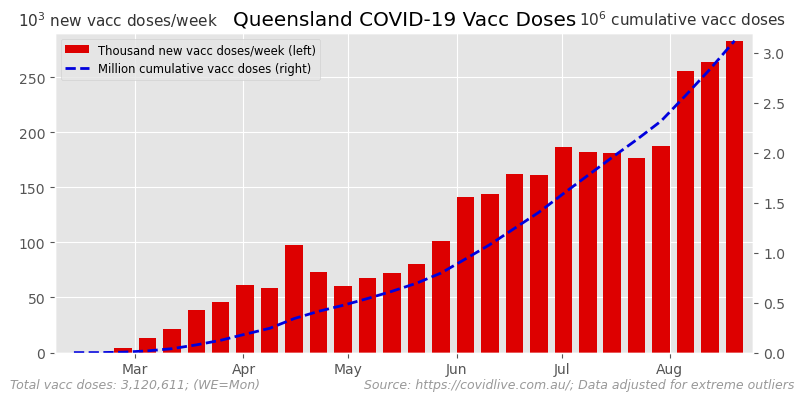

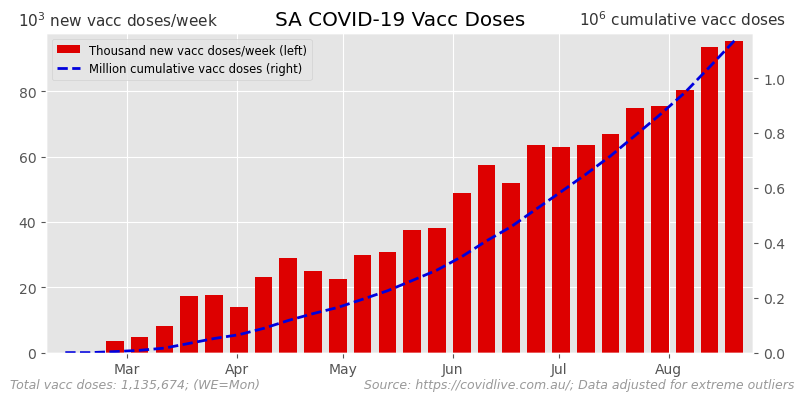

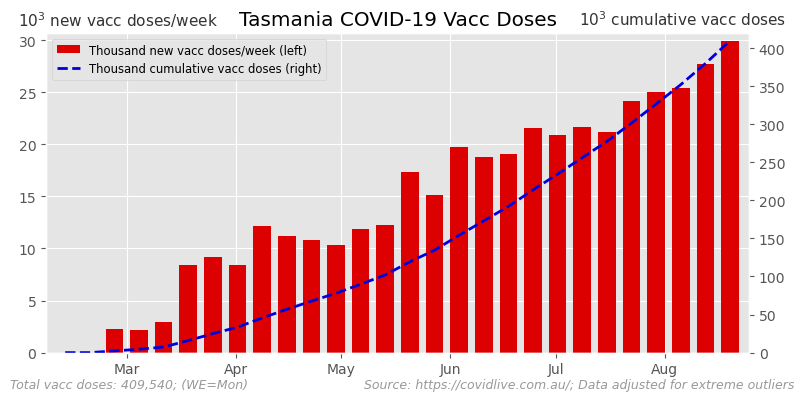

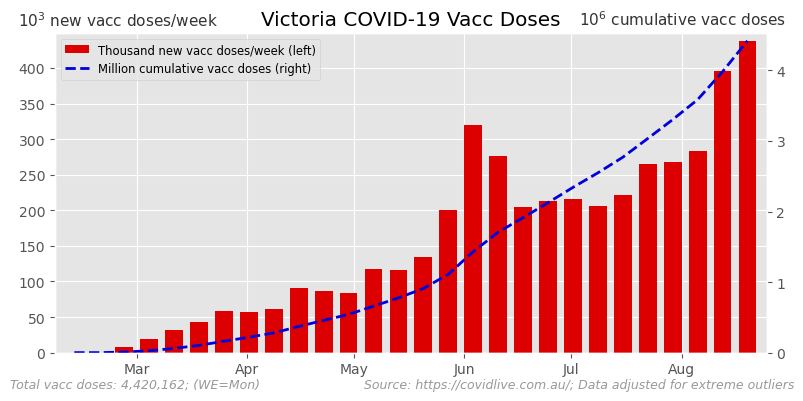

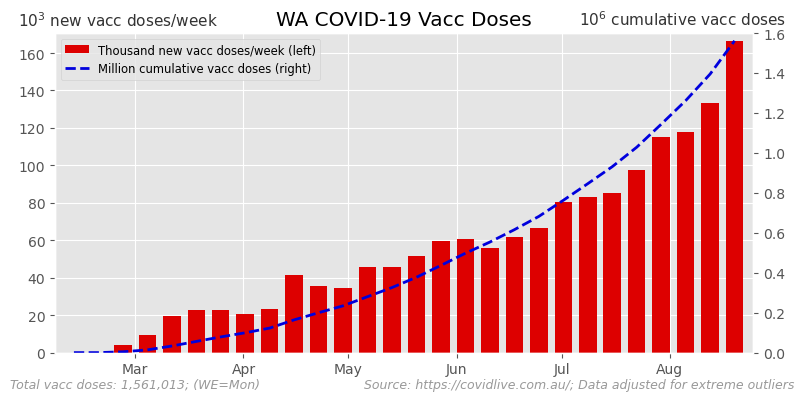

In [15]:
for item, desc in selected_cols.items():
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    
    daily = daily_c[item]
    ps.plot_weekly(
                   daily, desc, quality, 
                   chart_directory=CHART_DIRECTORY+'-!weekly-',
                   show=True,
                  )

## Bar Charts

In [16]:
name_map = {
    'NSW': 'NSW',
    'Victoria': 'Vic',
    'Queensland': 'Qld',
    'WA': 'WA',
    'SA': 'SA',
    'Tasmania': 'Tas',
    'NT': 'NT',
    'ACT': 'ACT',
    'Australia': 'Australia'
}

def two_bar_plots(data_dict, item, prefix, desc):
    """latest cumulative and cumulative per population charts
       Note: incomplete data on the last day is navigated."""
    
    # get latest valid data with date of validity
    frame = data_dict[item]
    last_valid = frame.apply(pd.Series.last_valid_index)
    last_valid = (
        (last_valid.dt.day.astype(str) 
         + '-' 
         + (last_valid.dt.month_name().astype(str)))
        .str[:6]
    )
    last_data = frame.ffill().iloc[-1]
    last_data_pc = (last_data / state_pop).round(1)
    last_data_pc = last_data_pc[last_data.index]
    
    serieses = (last_data.astype(int), last_data_pc)
    suffixes = ('', f' per {power_text.lower()} population')
    counts = (1, 2)
    
    for series, suffix, count in zip(serieses, suffixes, counts):
        #print(count, len(series), len(last_valid))
        series.index = series.index.map(name_map) + ' ' + last_valid
        series = series.sort_values()
        ps.plot_barh(series, 
                     title=f'{prefix} COVID19 {desc}{suffix}'.strip(),
                     save_as = f'{CHART_DIRECTORY}!bar-chart-{prefix}-{desc}-{suffix}.png',
                     rfooter=SOURCE,
                     show=True,
                    )


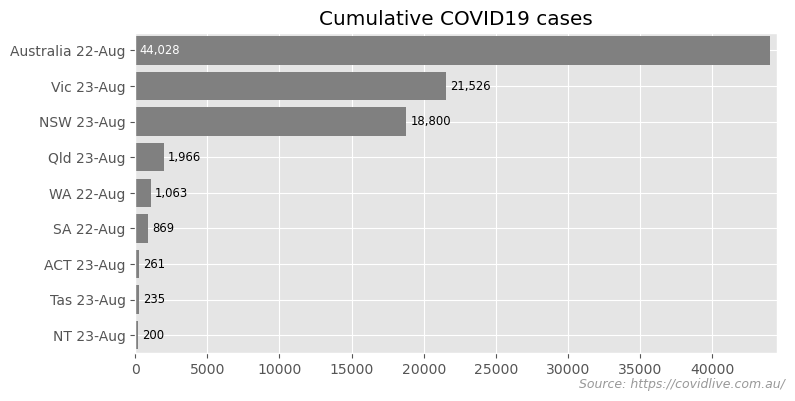

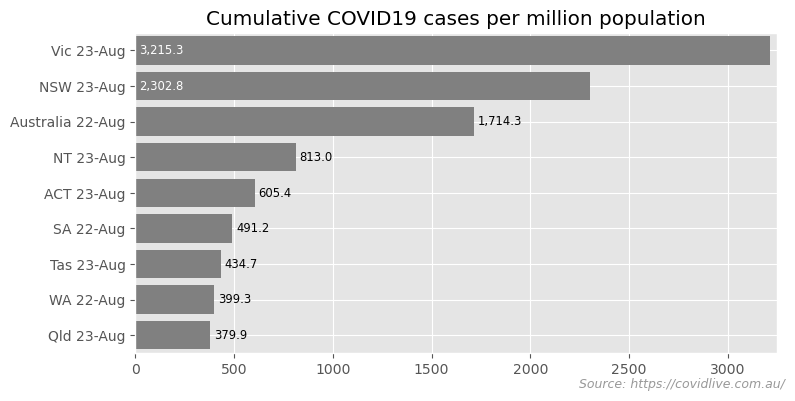

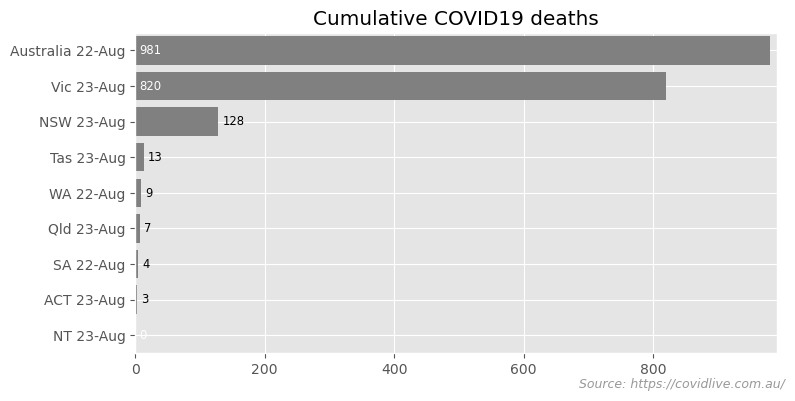

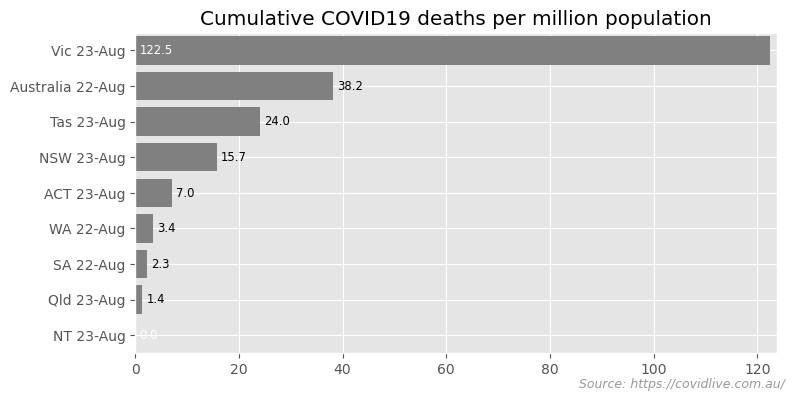

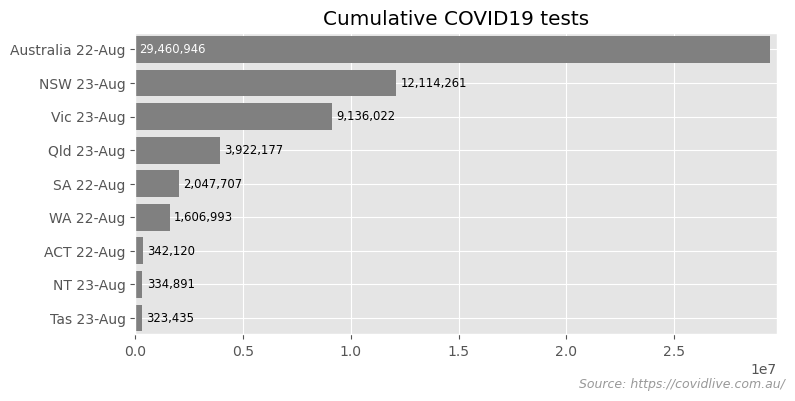

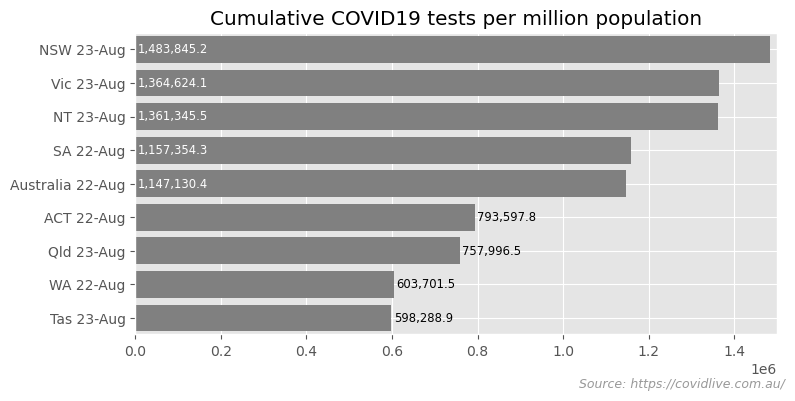

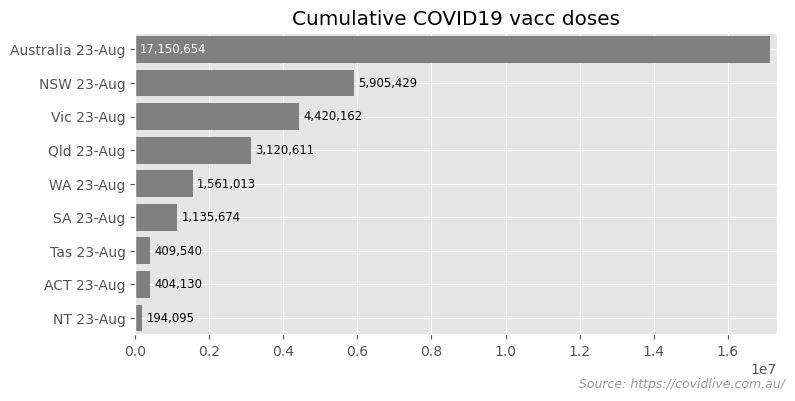

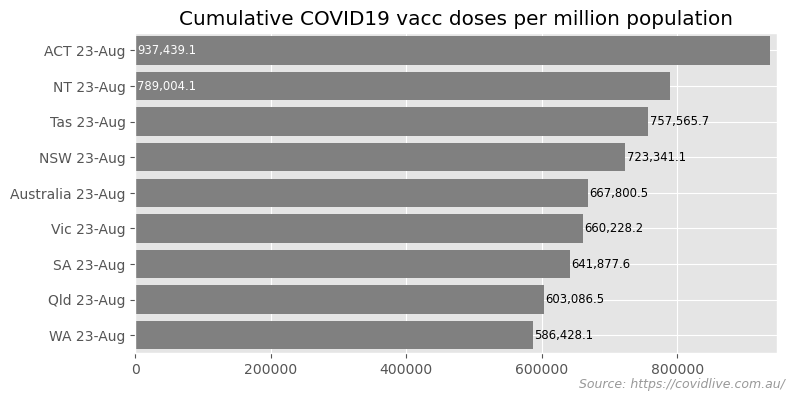

In [17]:
for item, desc in selected_cols.items():
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [18]:
# capture active items, with nans where data is not up to date
item = 'ACTIVE_CNT'
active_all = get_item(item, raw_json_data)
active_all.tail()

We are missing the latest ACTIVE_CNT for Australia, SA, WA
Lastest value less than its predecessor in ACTIVE_CNT for Queensland


NAME           ACT  Australia      NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                              
2021-08-19    83.0     8937.0   8473.0  1.0        79.0  2.0       0.0   
2021-08-20    94.0     9496.0   8978.0  1.0        68.0  2.0       0.0   
2021-08-21   102.0    10206.0   9657.0  1.0        51.0  2.0       0.0   
2021-08-22   121.0    10944.0  10337.0  1.0        39.0  2.0       0.0   
2021-08-23   137.0        NaN  10984.0  1.0        38.0  NaN       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-08-19      296.0  3.0  
2021-08-20      349.0  4.0  
2021-08-21      389.0  4.0  
2021-08-22      440.0  4.0  
2021-08-23      494.0  NaN

### Bar chart of active cases

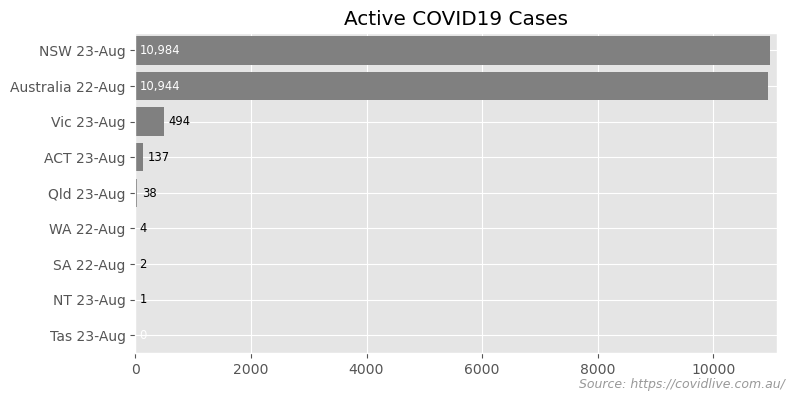

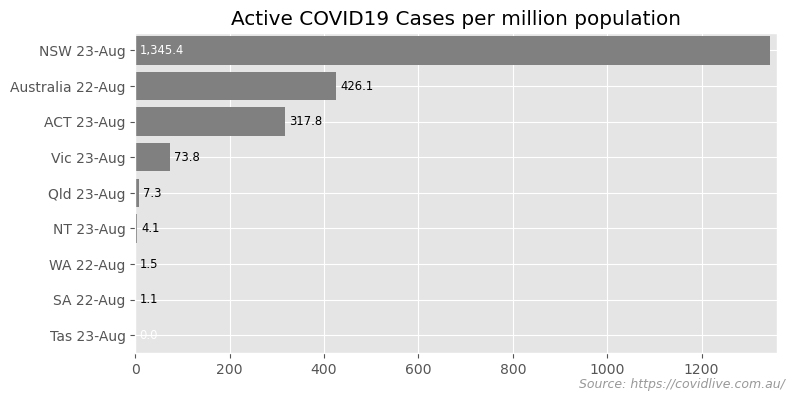

In [19]:
# bar chart of latest active cases, where data is complete
a_dict = {'active': active_all}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

In [20]:
def line_plots(table, title, ylabel):
    
    # initialise
    MARGINS = (0.005, 0.03)
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
    order = ['NSW', 'Victoria', 'Queensland', 'WA', 
             'SA', 'Tasmania', 'ACT', 'NT']

    # plot
    for recent in [0, RECENT]:
        data = table.iloc[-recent:]
        
        ax = None
        for state in order:
            ax = data[state].plot(label=state, lw=2.5)
        
        ax.margins(*MARGINS)
        ax.legend(loc='best')
        title_extra = '' if recent == 0 else ' (recent)'
                
        ps.finalise_plot(ax, title=title+title_extra, 
                     xlabel=None,
                     chart_directory=CHART_DIRECTORY,
                     ylabel=ylabel,
                     rfooter=SOURCE,
                     show=True,
                    )   

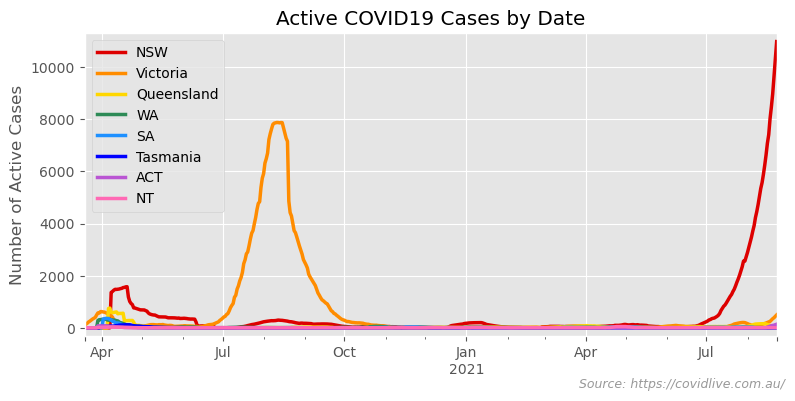

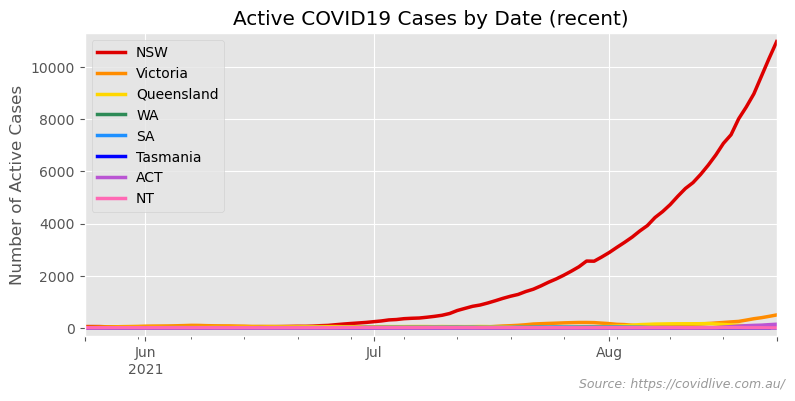

In [21]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
    
line_plots(active_all, 'Active COVID19 Cases by Date',
           'Number of Active Cases')

## Source of infection

### Extraction

In [22]:
Australia = 'Australia'
names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((raw_json_data.columns.str[:3] == 'SRC').sum() == len(names))

In [23]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in names.keys():
        table = get_item(item, raw_json_data)
        if Australia in table.columns: del table[Australia]
        soi_tables[names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia: continue
        table = pd.DataFrame()
        for item in names.keys():
            table[names[item]] = soi_tables[names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national) 
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [24]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

We are missing the latest SRC_OVERSEAS_CNT for Australia, SA, WA
We are missing the latest SRC_INTERSTATE_CNT for Australia, SA, WA
We are missing the latest SRC_CONTACT_CNT for Australia, SA, WA
We are missing the latest SRC_UNKNOWN_CNT for Australia, SA, WA
We are missing the latest SRC_INVES_CNT for Australia, SA, WA


### Check raw SOI data against raw case count data

In [25]:
soi_cases = {name: x.sum(axis=1) for name, x in state_soi_tables.items()}
soi_cases = pd.DataFrame(soi_cases)
soi_cases.tail(5)

NSW  Victoria  Queensland     SA      WA  Tasmania    ACT  \
REPORT_DATE                                                                  
2021-08-19   15717.0   21271.0      1961.0  869.0  1062.0     235.0  207.0   
2021-08-20   16353.0   21328.0      1962.0  869.0  1063.0     235.0  218.0   
2021-08-21   17173.0   21389.0      1964.0  869.0  1063.0     235.0  226.0   
2021-08-22   17997.0   21455.0      1964.0  869.0  1063.0     235.0  245.0   
2021-08-23   18800.0   21526.0      1966.0    NaN     NaN     235.0  261.0   

                NT  
REPORT_DATE         
2021-08-19   200.0  
2021-08-20   200.0  
2021-08-21   200.0  
2021-08-22   200.0  
2021-08-23   200.0

In [26]:
cases = cum_u['CASE_CNT'][soi_cases.columns]
cases.tail(5)

NAME             NSW  Victoria  Queensland     SA      WA  Tasmania    ACT  \
REPORT_DATE                                                                  
2021-08-19   15717.0   21271.0      1961.0  869.0  1062.0     235.0  207.0   
2021-08-20   16353.0   21328.0      1962.0  869.0  1063.0     235.0  218.0   
2021-08-21   17173.0   21389.0      1964.0  869.0  1063.0     235.0  226.0   
2021-08-22   17997.0   21455.0      1964.0  869.0  1063.0     235.0  245.0   
2021-08-23   18800.0   21526.0      1966.0    NaN     NaN     235.0  261.0   

NAME            NT  
REPORT_DATE         
2021-08-19   200.0  
2021-08-20   200.0  
2021-08-21   200.0  
2021-08-22   200.0  
2021-08-23   200.0

In [27]:
state_soi_tables['ACT'].tail(5)

Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2021-08-19       95.0         9.0           87.0              3.0   
2021-08-20       95.0         8.0          104.0              1.0   
2021-08-21       95.0         8.0          111.0              1.0   
2021-08-22       95.0         8.0          130.0              1.0   
2021-08-23       95.0         8.0          146.0              1.0   

             Investigating  
REPORT_DATE                 
2021-08-19            13.0  
2021-08-20            10.0  
2021-08-21            11.0  
2021-08-22            11.0  
2021-08-23            11.0

### Plot national SOI 

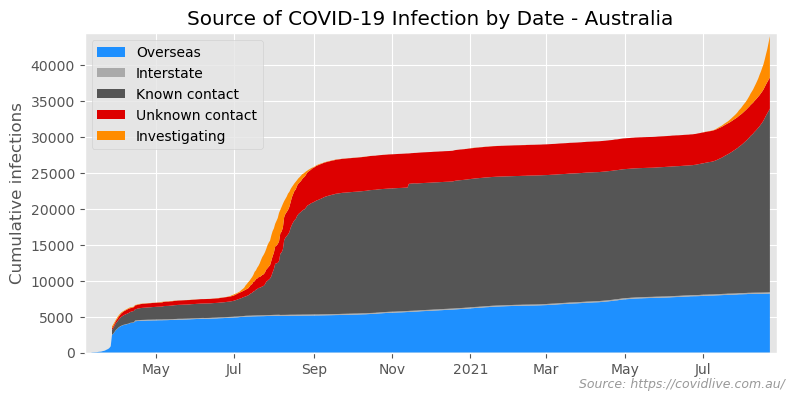

In [28]:
# plot time series of national totals
serious_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(serious_colours) == len(names)) # check we have the right number of colours
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)

labels = list(names.values())
args = [soi_national[name] for name in labels]
fig, ax = plt.subplots()
ax.stackplot(soi_national.index, *args, labels=labels)
ax.legend(loc='upper left')
ax.margins(0.01)

title = 'Source of COVID-19 Infection by Date - Australia'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel=None, ylabel='Cumulative infections',
                 rfooter=SOURCE,
                 show=True,
                )

In [29]:
# extract the latest data, and under investigation
latest = pd.DataFrame()
for state in state_soi_tables.keys():
    latest[state] = state_soi_tables[state].iloc[-1]

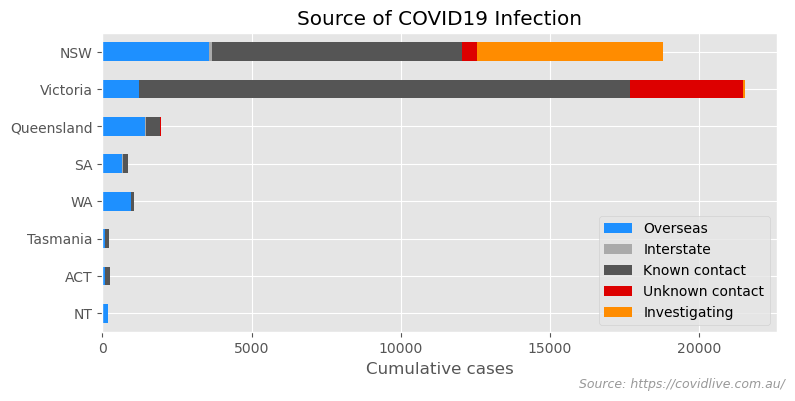

In [30]:
# plot the latest data
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
ax = latest.T[::-1].plot.barh(stacked=True)
title = 'Source of COVID19 Infection'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel='Cumulative cases', ylabel=None,
                 rfooter=SOURCE,
                 show=True,
                )

### Plot cases under investigation by state

In [31]:
under_investigation = soi_tables['Investigating']

# These are running totals (and will go up and down)
under_investigation.tail()

NAME          ACT     NSW   NT  Queensland   SA  Tasmania  Victoria   WA
REPORT_DATE                                                             
2021-08-19   13.0  4179.0  0.0         0.0  0.0       0.0      13.0  0.0
2021-08-20   10.0  4560.0  0.0         0.0  0.0       0.0      16.0  0.0
2021-08-21   11.0  5134.0  0.0         0.0  0.0       0.0      18.0  0.0
2021-08-22   11.0  5686.0  0.0         0.0  0.0       0.0      30.0  0.0
2021-08-23   11.0  6232.0  0.0         0.0  NaN       0.0      52.0  NaN

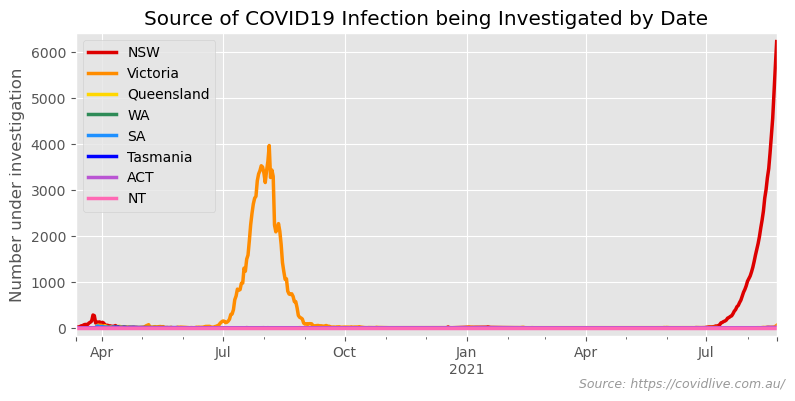

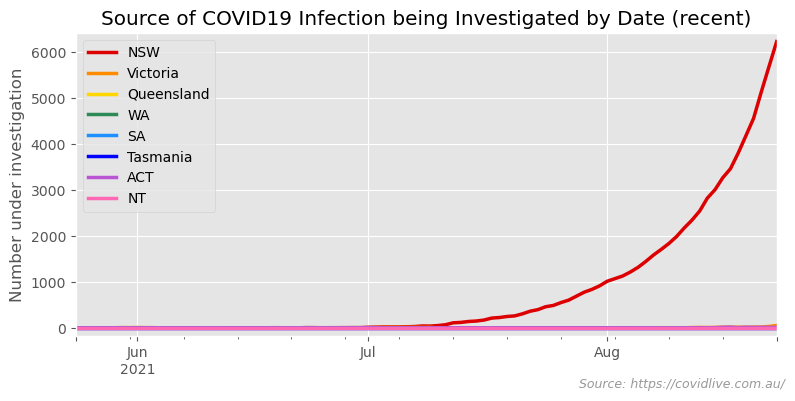

In [32]:
line_plots(under_investigation, 
           'Source of COVID19 Infection being Investigated by Date',
           'Number under investigation',
          )

## Local cases - speculative 
Note: calculated using the source of infection (SOI) data
Note: offten the SOI data doesn't match the cases data, even though it should.

### Create dataframe of local tranmission

In [33]:
# calculate raw data from from Sourse of Infection data collected above
local_trans = list(names.values()) # names dictionary defined above
local_trans.remove('Overseas')

def get_local_trans():
    local_trans_d = {}
    for state in state_soi_tables.keys():
        local_trans_d[state] = state_soi_tables[state][local_trans].sum(axis=1)
    local_trans_df = pd.DataFrame(local_trans_d)
    return local_trans_df

In [34]:
local_trans_df = get_local_trans()
local_nan_map = local_trans_df.isna()

# check raw data - most recent cumulative totals
local_trans_df.tail(10)

NSW  Victoria  Queensland     SA     WA  Tasmania    ACT  \
REPORT_DATE                                                                 
2021-08-14    9522.0   19904.0       519.0  215.0  115.0     150.0   35.0   
2021-08-15    9931.0   19929.0       519.0  215.0  115.0     150.0   38.0   
2021-08-16   10404.0   19951.0       519.0  215.0  115.0     150.0   57.0   
2021-08-17   10840.0   19975.0       520.0  215.0  115.0     150.0   74.0   
2021-08-18   11466.0   19999.0       520.0  215.0  115.0     150.0   96.0   
2021-08-19   12137.0   20056.0       520.0  215.0  115.0     150.0  112.0   
2021-08-20   12771.0   20111.0       521.0  215.0  115.0     150.0  123.0   
2021-08-21   13584.0   20172.0       521.0  215.0  115.0     150.0  131.0   
2021-08-22   14408.0   20237.0       521.0  215.0  115.0     150.0  150.0   
2021-08-23   15211.0   20308.0       522.0    NaN    NaN     150.0  166.0   

               NT  
REPORT_DATE        
2021-08-14   14.0  
2021-08-15   14.0  
2021-08-16   15.0  
2021-08-17   15.0  
2021-08-18   15.0  
2021-08-19   15.0  
2021-08-20   15.0  
2021-08-21   15.0  
2021-08-22   15.0  
2021-08-23   15.0

In [35]:
# check raw data - most recent daily new cases
local_trans_df.diff().tail()

NSW  Victoria  Queensland   SA   WA  Tasmania   ACT   NT
REPORT_DATE                                                            
2021-08-19   671.0      57.0         0.0  0.0  0.0       0.0  16.0  0.0
2021-08-20   634.0      55.0         1.0  0.0  0.0       0.0  11.0  0.0
2021-08-21   813.0      61.0         0.0  0.0  0.0       0.0   8.0  0.0
2021-08-22   824.0      65.0         0.0  0.0  0.0       0.0  19.0  0.0
2021-08-23   803.0      71.0         1.0  NaN  NaN       0.0  16.0  0.0

In [36]:
# make the usual adjustments
LOCAL = 'LOCAL_TRANS'

# the next step assumes the data for today is fully updated.
# but if not, we roll forward yesterday's numbers so that
# the cumulative bar charts (below) are complete.
cum_u[LOCAL] = (
    local_trans_df
    .sort_index(ascending=True)
)

daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

In [37]:
# What does the most recent data look like when adjusted ...
daily_c[LOCAL].iloc[-5:]

NSW  Victoria  Queensland   SA   WA  Tasmania   ACT   NT
REPORT_DATE                                                            
2021-08-19   671.0      57.0         0.0  0.0  0.0       0.0  16.0  0.0
2021-08-20   634.0      55.0         1.0  0.0  0.0       0.0  11.0  0.0
2021-08-21   813.0      61.0         0.0  0.0  0.0       0.0   8.0  0.0
2021-08-22   824.0      65.0         0.0  0.0  0.0       0.0  19.0  0.0
2021-08-23   803.0      71.0         1.0  NaN  NaN       0.0  16.0  0.0

### Bar charts cumulative local transmission

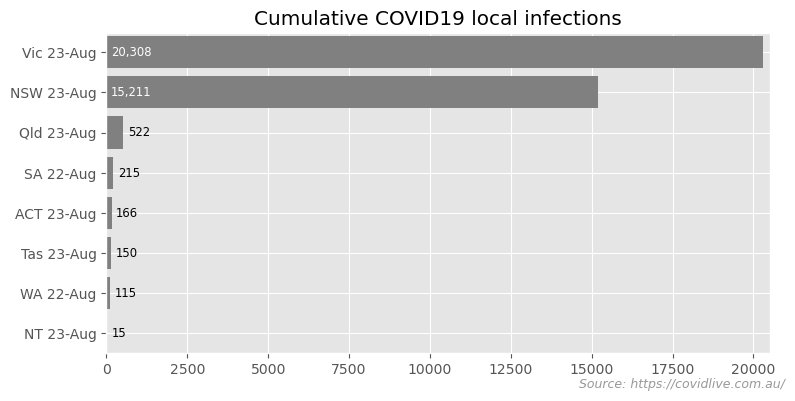

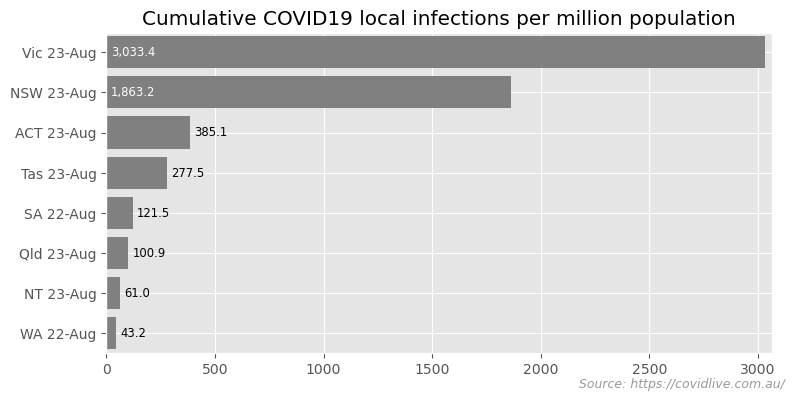

In [38]:
two_bar_plots(cum_u, LOCAL, 'Cumulative', 'local infections')

### Weekly charts for local transmission

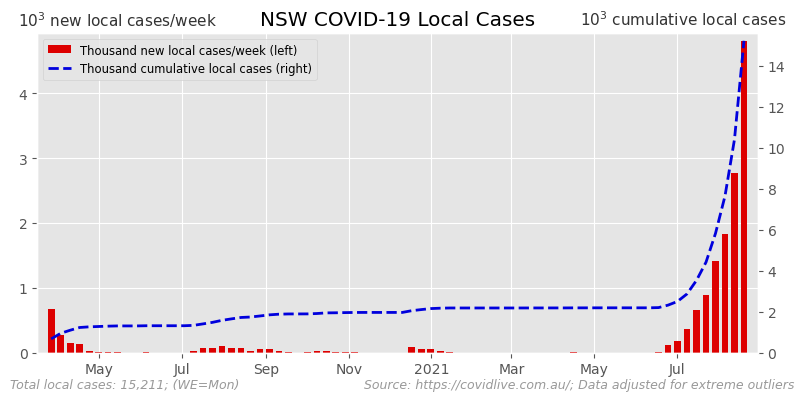

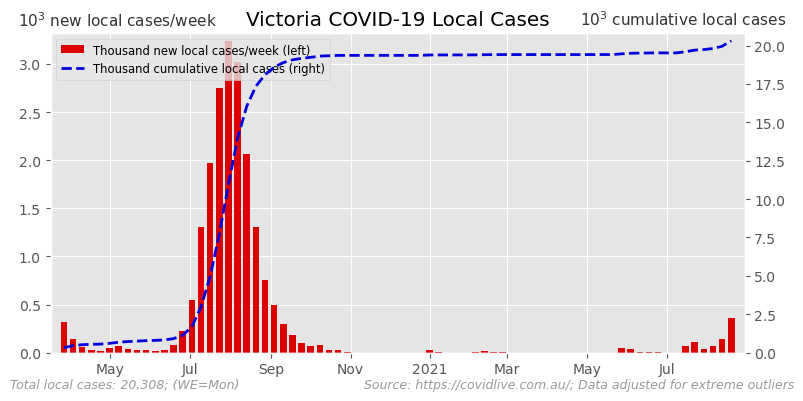

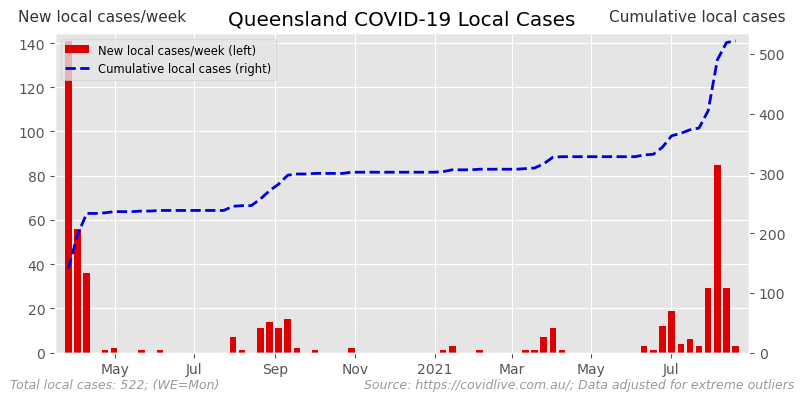

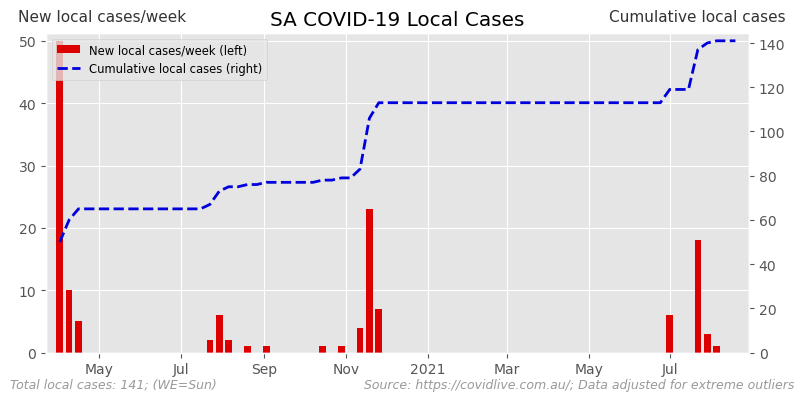

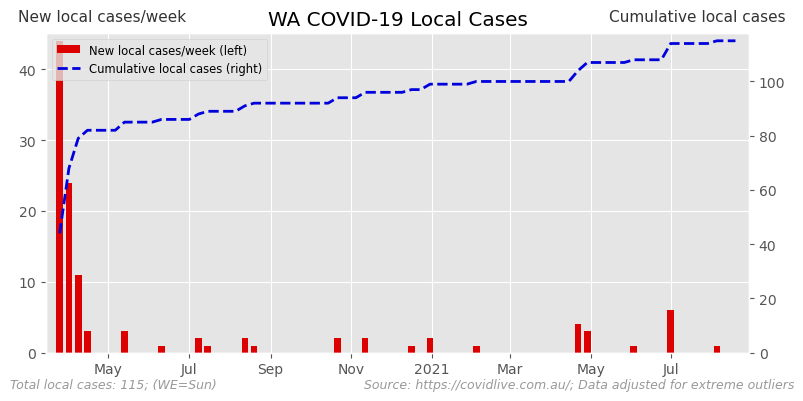

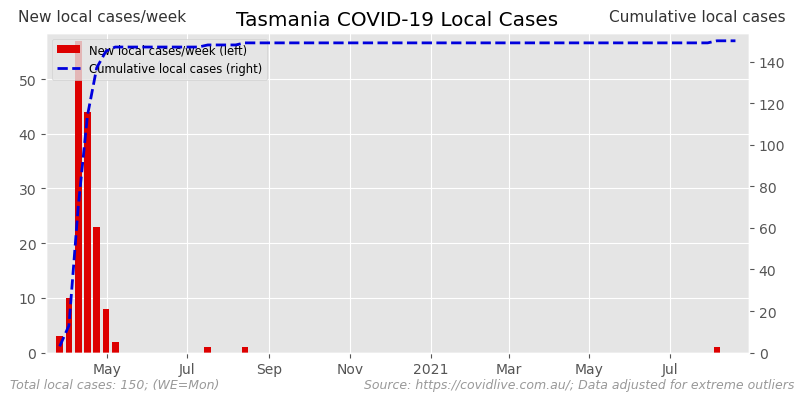

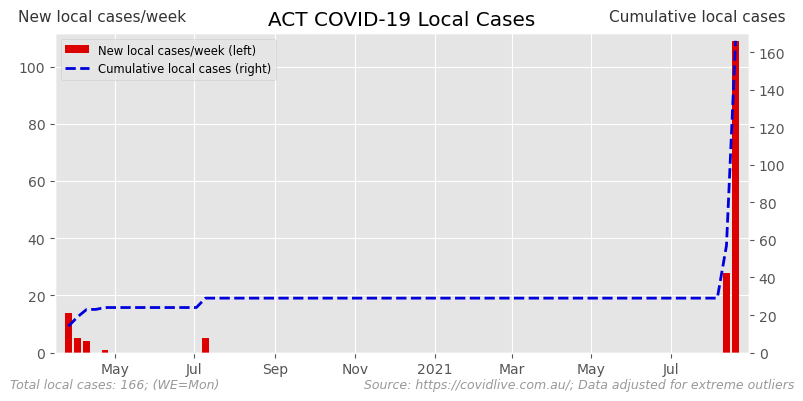

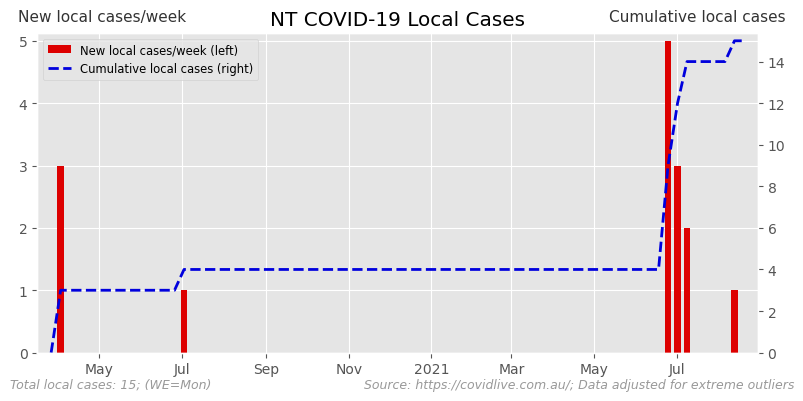

In [39]:
quality = pd.Series(dtype=str)
for state in daily_u[LOCAL].columns:
    if (daily_u[LOCAL][state] == daily_c[LOCAL][state]).all():
        quality[state] = f'{SOURCE}; Original data'
    else:
        quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

desc = 'local cases'
ps.plot_weekly(
    daily_c[LOCAL], desc, quality, 
    chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
    show=True,
)

### Recent local transmission daily charts

In [40]:
local_lfooter = f'Local = {" + ".join(local_trans)}'

def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        MARGINS = 0.015
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(MARGINS) # seems to work here
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange', lw=2.5)
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue', lw=2.5)
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'Period total: {series.sum():,.0f}',
                       ha='left', va='top',
                       fontsize=9, fontstyle='italic',
                       color='#999999')
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=f"{CHART_DIRECTORY}-recent-local-",
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         lfooter=local_lfooter,
                         rfooter=SOURCE,
                         show=True,
                        )

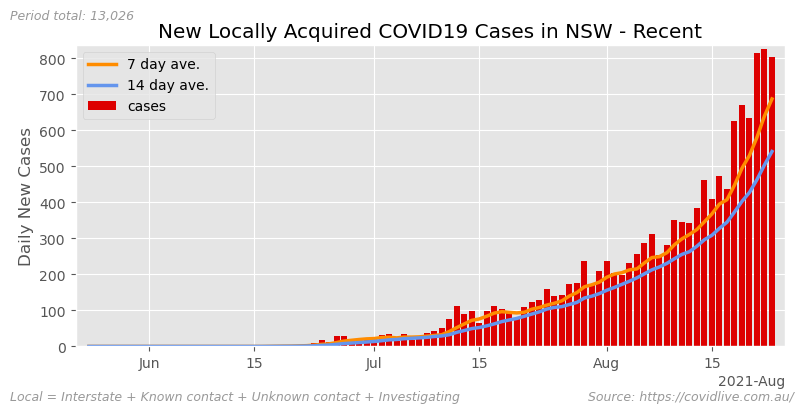

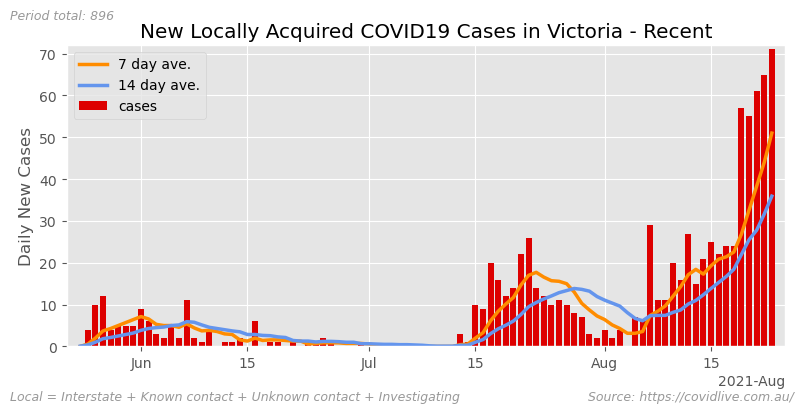

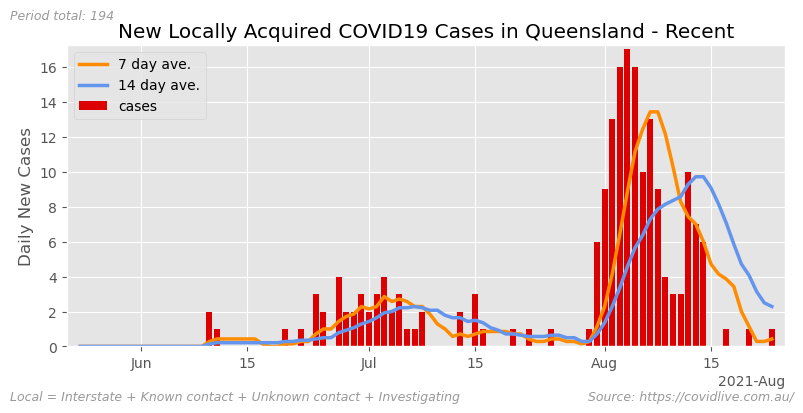

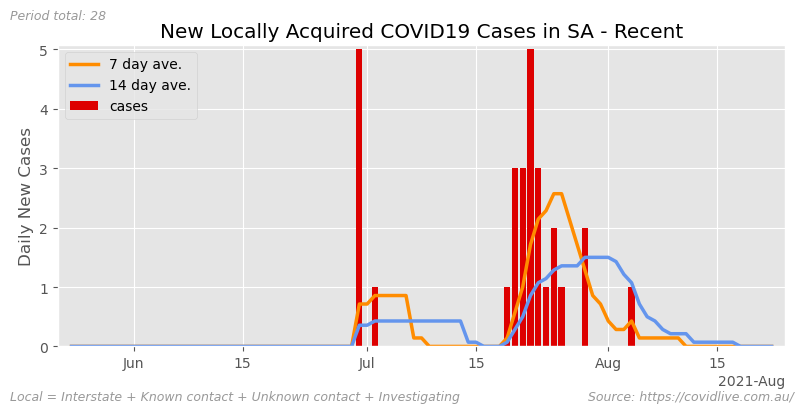

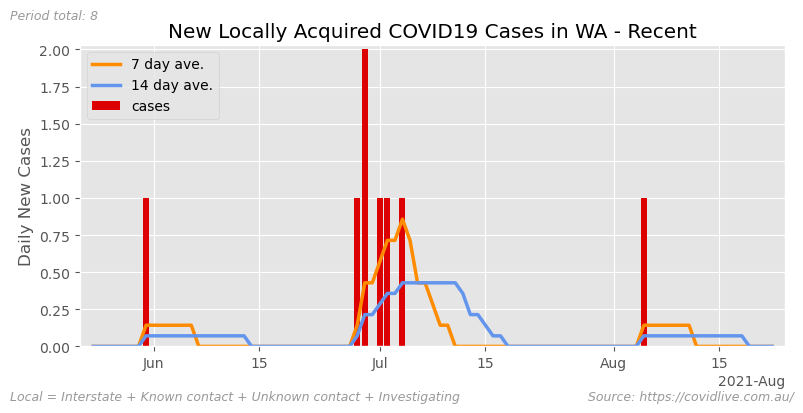

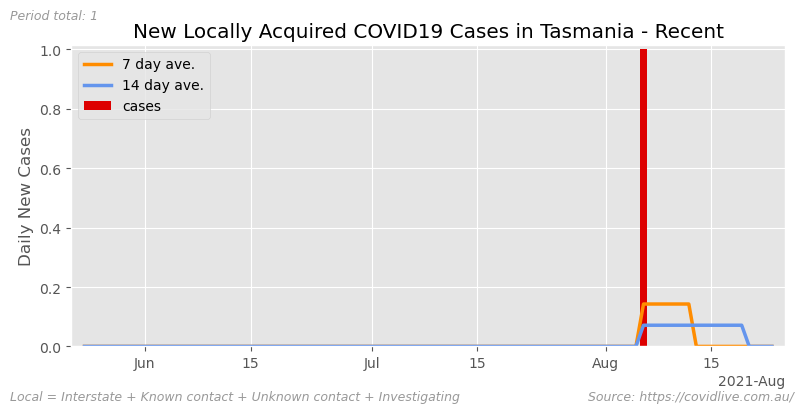

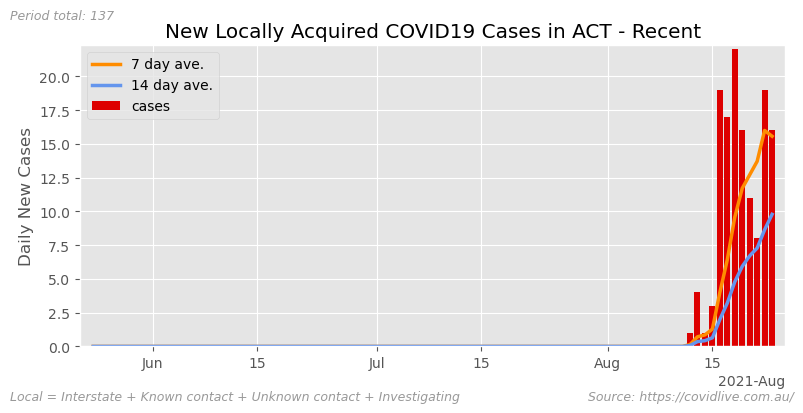

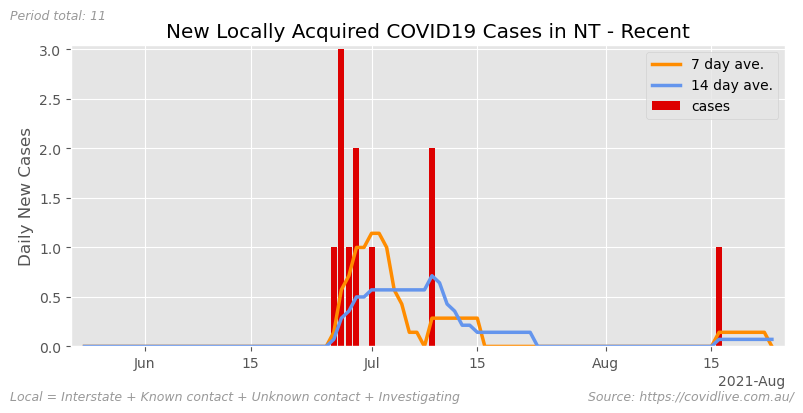

In [41]:
# and plot it
recent_bar_with_ma_plot(daily_c[LOCAL], "cases")

### Current outbreaks

Note: requires the data for today to be updated.

In [42]:
def select(state, start_date, span_days=100):
    series = daily_c[LOCAL][state].dropna()
    return (
        series[series.index >= pd.Timestamp(start_date)]
        .iloc[:span_days]
        .reset_index(drop=True)
    )


def plot_outbreaks(outbreaks, colours, span_days=100, **kwargs):

    serieses = {}
    for label, (state, start_date, reduced_span) in outbreaks.items():
        span = reduced_span if reduced_span and reduced_span < span_days else span_days
        serieses[label] = select(state, start_date, span_days=span)
    outbreak_df = pd.DataFrame(serieses)

    # check day zero is zero, and day one is more than zero
    assert( (outbreak_df.iloc[0] == 0).all() )
    assert( (outbreak_df.iloc[1] > 0).all() )
    
    datasets = [outbreak_df, outbreak_df.cumsum()]
    ylabels =  ['New cases on day', 'Cumulative new cases']
    for ylabel, data in zip(ylabels, datasets):
        ax = data.plot(color=colours, lw=2.5)
        
        # add Henderson moving averages if we have enough data
        MA_TERM = 13 # must be odd
        if ylabel == ylabels[0] and len(data) >= MA_TERM:
            hma = pd.DataFrame()
            for col in data.columns:
                input_ = data[col].dropna()
                if len(input_) >= MA_TERM:
                    hma[col] = Henderson.Henderson(input_, MA_TERM)
            if not hma.empty:
                hma.columns = hma.columns + ' moving ave.'
                hma.plot(color=colours, lw=1, ls='-.', ax=ax, label=None)
            ax.legend(ncol=1, prop={'size': 8})

        # smaller margins
        MARGINS = 0.025
        ax.margins(MARGINS)
                
        # and finalise the plot
        if "title" not in kwargs:
            kwargs["title"] = 'Local Outbreak' + ('s' if len(data.columns) > 1 else '')
            kwargs["title"] = kwargs["title"] + ': ' + ", ".join(data.columns)
            
        ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            ylabel=ylabel,
            xlabel=f'Day of the outbreak',
            save_tag=ylabel.split()[0],
            lfooter='Day zero is the last zero new cases day before new cases',
            rfooter=SOURCE,
            show=True,
            **kwargs, 
        )
        

colours = ['darkorange', '#555555', '#dd0000', 
           'royalblue', 'deepskyblue', 'orchid', 'darkred']

In [43]:
nsw = {
    'NSW Jun-21 (Delta)':  ['NSW',        '2021-06-16',  None, ],
}

vic = {
    'Vic Jul-21 (Delta)':  ['Victoria',   '2021-07-12',  None, ],    
}

qld = {
    'Qld Jul-21 (Delta)':  ['Queensland', '2021-07-29',  None, ],     
}

sa = {
    'SA Jul-21':   ["SA",         '2021-07-18',  None, ],
}

act = {
    'ACT Aug-21 (Delta)':        ['ACT',        '2021-08-11',  None, ], 
}

older = {
    'Qld Jun-21':  ['Queensland', '2021-06-19',  40, ],
    'NT Jun-21':   ['NT',         '2021-06-25',  40, ],
    'WA Jun-21':   ['WA',         '2021-06-27',  40, ],  
    'SA Jun-21':   ["SA",         '2021-06-29',  16, ],

}

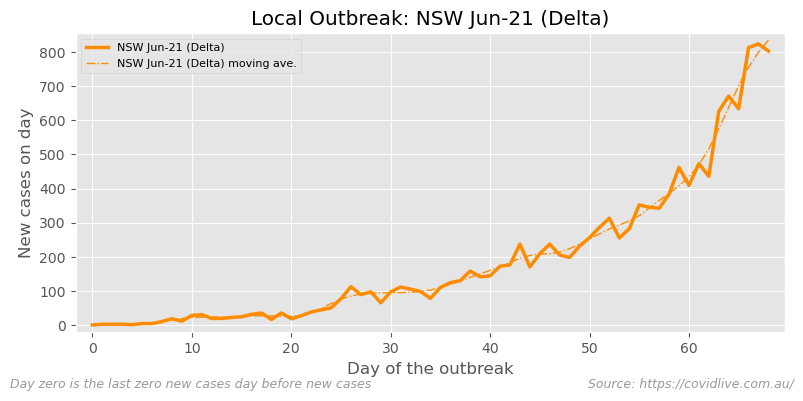

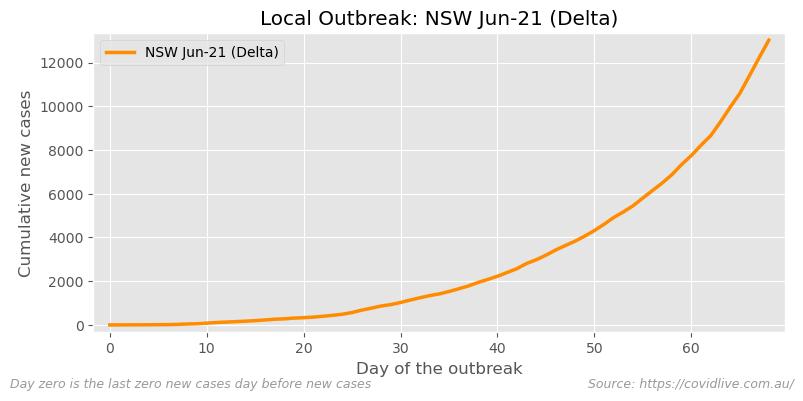

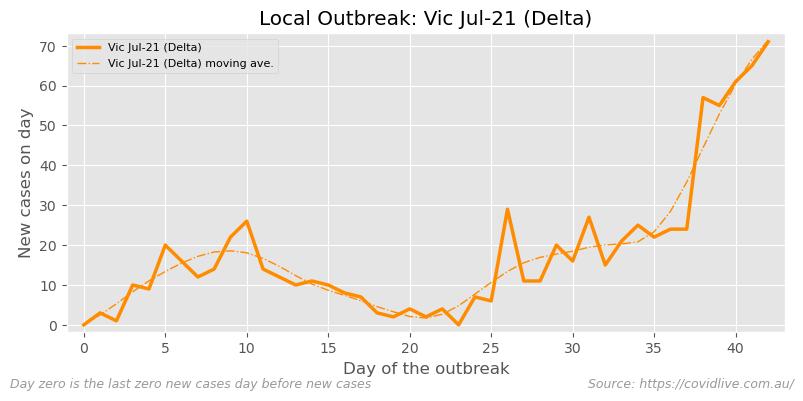

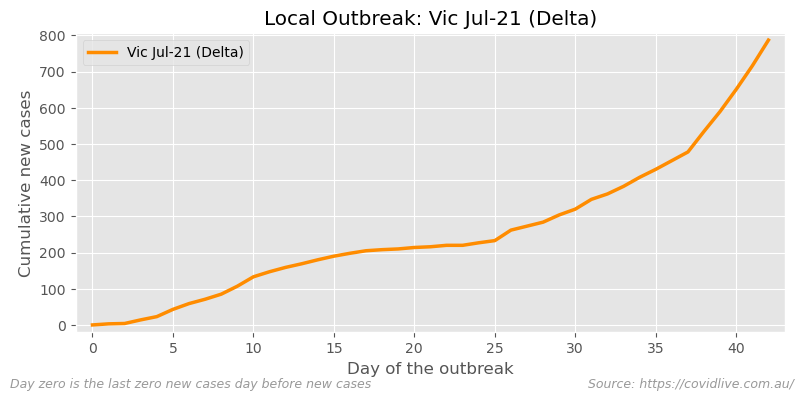

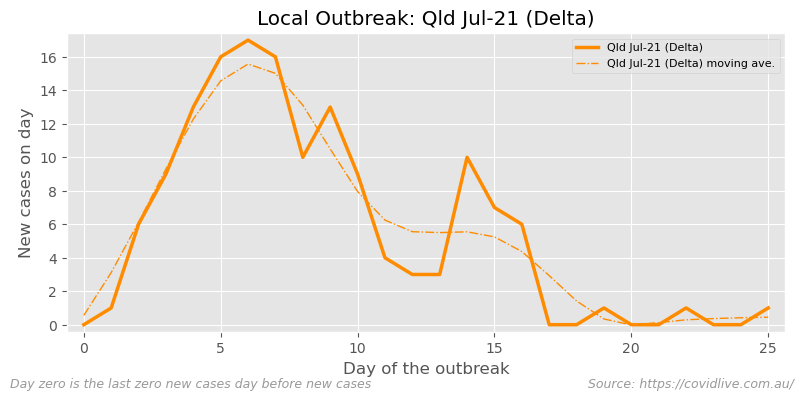

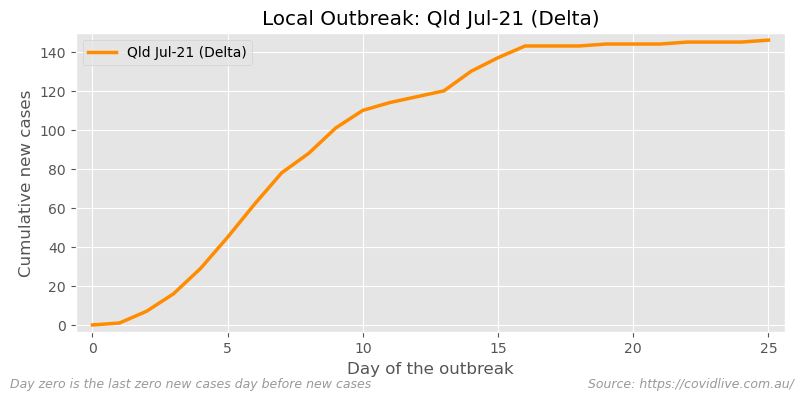

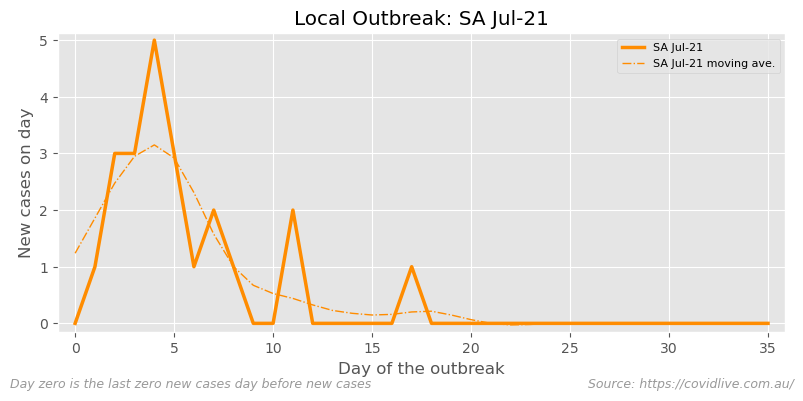

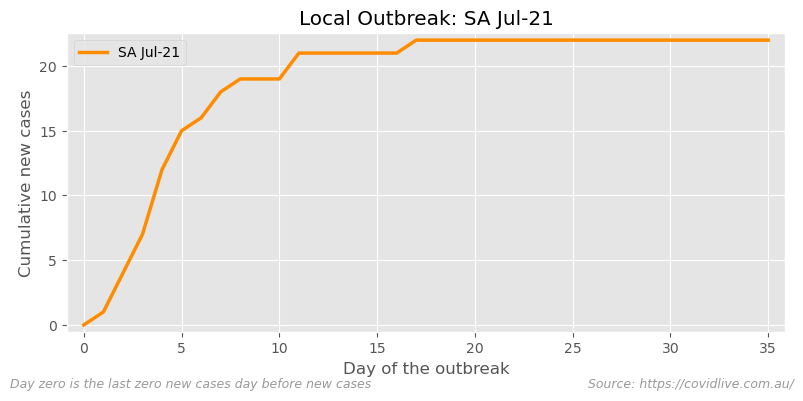

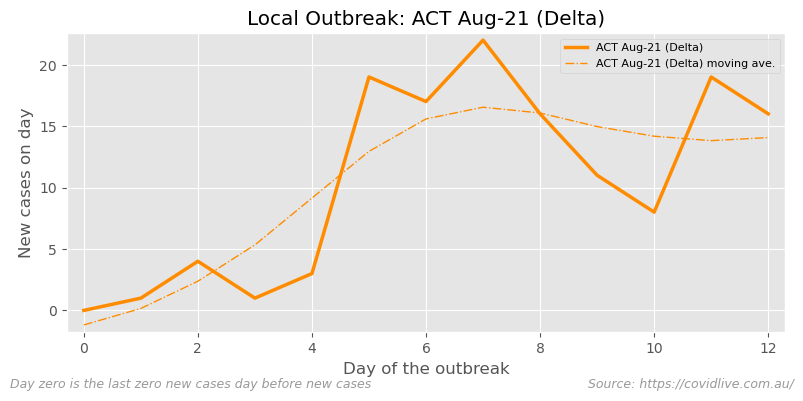

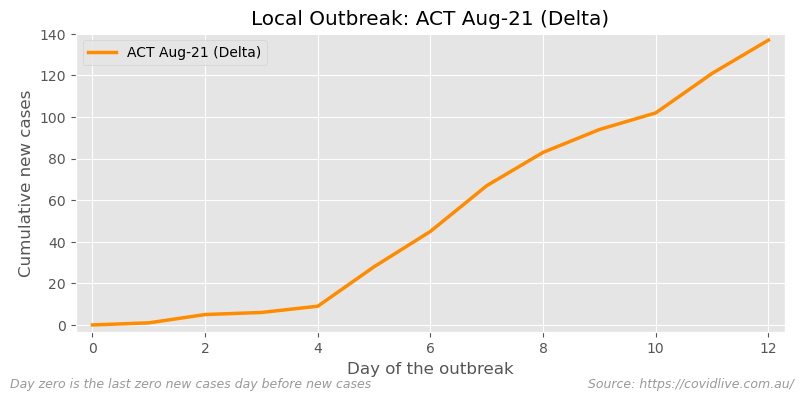

In [44]:
plot_outbreaks(nsw, colours, span_days=100)
plot_outbreaks(vic, colours, span_days=100)
plot_outbreaks(qld, colours, span_days=100)
plot_outbreaks(sa, colours, span_days=100)
plot_outbreaks(act, colours, span_days=100)
#plot_outbreaks(older, colours[3:], span_days=100)

### Historic Outbreaks
*  After (i.e. ignoring) the first wave in March/April 2020
*  Wave larger than 100 cases in total

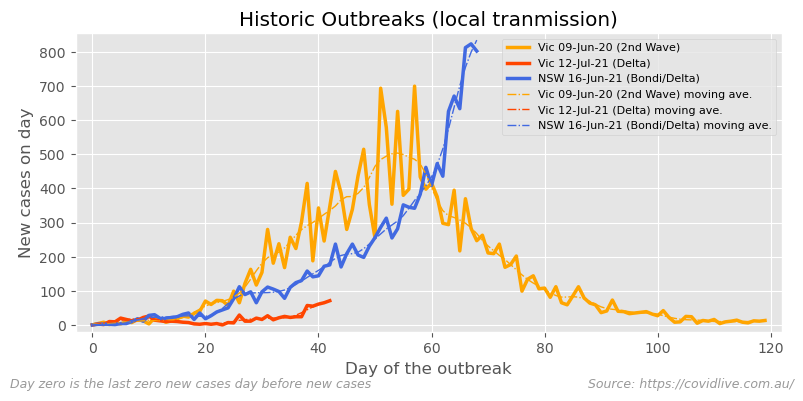

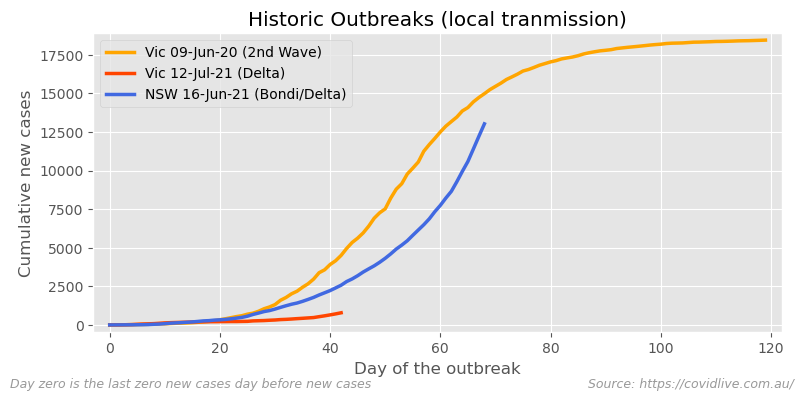

In [45]:
historic = {
    #'NSW 08-Jul-20 (Crossroads)':    ['NSW',      '2020-07-08', 120],
    #'NSW 16-Dec-20 (Avalon)':        ['NSW',      '2020-12-16', 120],
    'Vic 09-Jun-20 (2nd Wave)':      ['Victoria', '2020-06-09', 120],
    #'Vic 24-May-21 (Wollert)':       ['Victoria', '2021-05-24', 36],
    'Vic 12-Jul-21 (Delta)':         ['Victoria', '2021-07-12',  None, ],
    'NSW 16-Jun-21 (Bondi/Delta)':   ['NSW',      '2021-06-16', None],
}
colors = ['orange', 'orangered', 'royalblue',]
MAXIMUM = 121

plot_outbreaks(historic, colors, span_days=MAXIMUM, 
               title='Historic Outbreaks (local tranmission)')

### Outbreak Growth Factors

Check Vic Jun-20 (2nd Wave) starting point: [0. 4.]


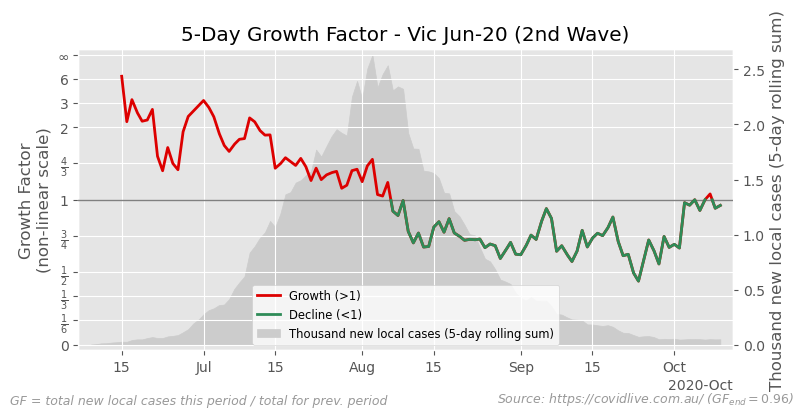

Check NSW Jun-21 (Delta-Bondi) starting point: [0. 2.]


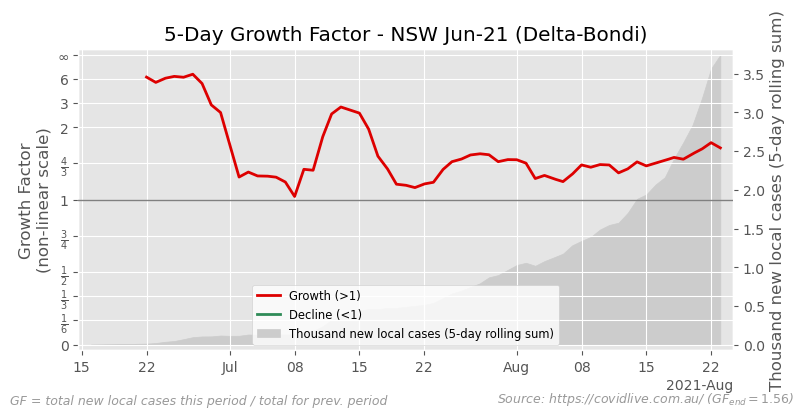

Check Vic Jul-21 (Delta) starting point: [0. 3.]


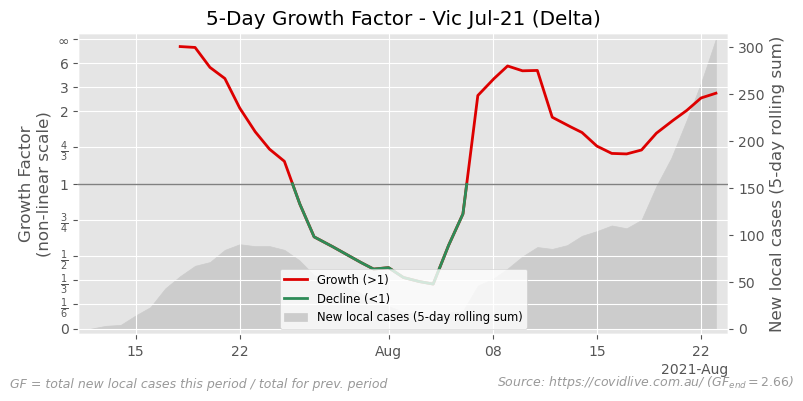

Check Qld Jul-21 starting point: [0. 1.]


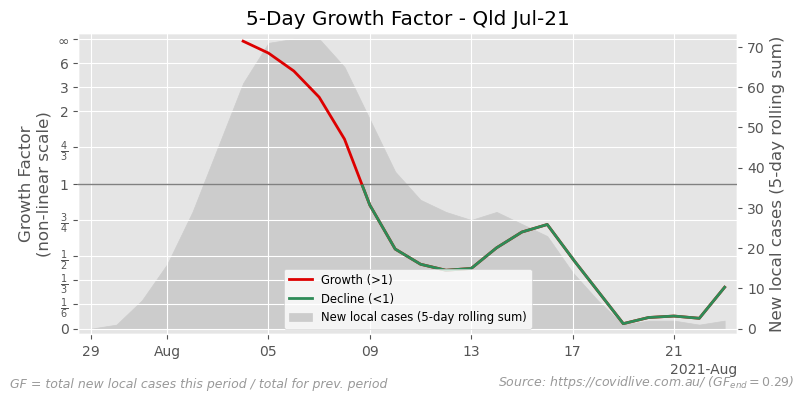

Check ACT Aug-21 (Delta) starting point: [0. 1.]


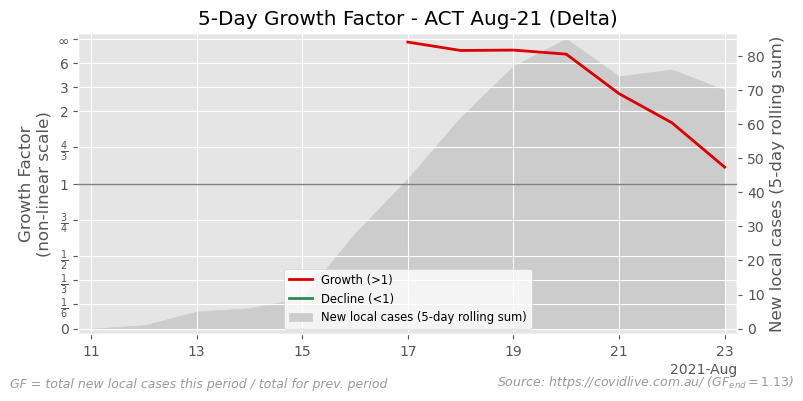

In [46]:
states = {
    # name                        state         start         length
    'Vic Jun-20 (2nd Wave)':     ('Victoria', '2020-06-09', '2020-10-10'),
    'NSW Jun-21 (Delta-Bondi)':  ['NSW',        '2021-06-16',  None, ],
    'Vic Jul-21 (Delta)':        ['Victoria',   '2021-07-12',  None, ],
    'Qld Jul-21':                ['Queensland', '2021-07-29',  None, ],    
    'ACT Aug-21 (Delta)':        ['ACT',        '2021-08-11',  None, ], 
}

GROWTH_FACTOR_LIST = [5, ] # [5, 7]

gf = {}
for name, (state, start, length) in states.items():
    s = daily_c[LOCAL][state].dropna()
    s = s[s.index >= pd.Timestamp(start)]
    if length:
        s = s[s.index <= pd.Timestamp(length)]
    print(f'Check {name} starting point: {s[:2].values}')
    
    for period in GROWTH_FACTOR_LIST:

        index = f'{name}{period}'
        gf[index] = ps.plot_growth_factor(
            s,
            period=period,
            mode = 'new local cases',
            title=f'{period}-Day Growth Factor - {name}', 
            chart_directory=f"{CHART_DIRECTORY}",
            ylabel='Growth Factor',
            loc='lower center',
            xlabel=None,
            rfooter=SOURCE,
            show=True,
        )

### Model for the effective reproduction number $R_t$

The SIR compartmental model in discrete terms can be expressed with the following three equations:


1.   $S_t=S_{t-1}-\beta_tI_{t−1}\frac{S_{t−1}}{N}$

1.   $I_t=I_{t−1}+\beta_tI_{t−1}\frac{S_{t−1}}{N}-\gamma I_{t−1}$

1.   $R_t=R_{t−1}+\gamma I_{t−1}$

Where:
*   $\beta_t$ = $R_t$ / infectious period
*   $\gamma$ = 1 / infectious period

The middle line of this set of equations shows that the number infectious on day t is the number infectious on the previous day, plus the newly infectious on day t, minus those who are no longer infectious on day t.

We can take the middle element, assume that S/N is one, and derive the effective reproduction number ($R_t$), based on the following identity:

$$
R_t = \frac{newly\ infectious_t}{infectious\ cohort_{t-1}} * infectious\ period
$$

We will smooth the daily infections data in order to manage noise.

We are assuming the average infectiousness period is 7 days for COVID19. 

In [47]:
def model_effective_reproduction(newly_infectious_on_day, 
                                 infectious_period=7):

    # Need at least infectious period data to make sense
    IGNORE_INITIAL = infectious_period + 1 # days 
    SMOOTH_TERM = 13
    
    # sanity check
    if len(newly_infectious_on_day) < SMOOTH_TERM:
        print(f'Insufficient data to calculate the effective reproduction number')
        return None
    
    
    # smooth infections data
    newly_infectious_t = Henderson.Henderson(newly_infectious_on_day, SMOOTH_TERM)
    
    infectious_t_minus_1 = (
        newly_infectious_t
        .rolling(infectious_period, min_periods=1)
        .sum()
        .shift(1)
        .dropna()
    )
    
    return (newly_infectious_t / infectious_t_minus_1 * infectious_period)[IGNORE_INITIAL:]
    

In [48]:
analysis_frame = {
    'Vic Jun-20 (2nd Wave)':     ['Victoria',   '2020-06-10',  120],    
    'NSW Jun-21 (Delta-Bondi)':  ['NSW',        '2021-06-17',  None, ],
    'Vic Jul-21 (Delta)':        ['Victoria',   '2021-07-12',  None, ],
    'ACT Aug-21 (Delta)':        ['ACT',        '2021-08-11',  None, ], 
}

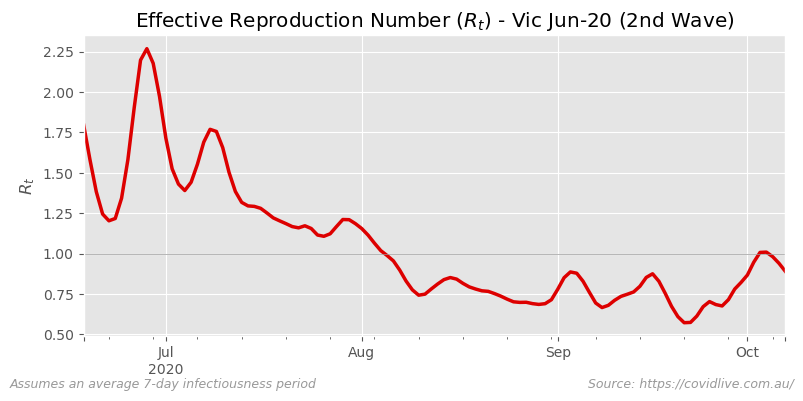

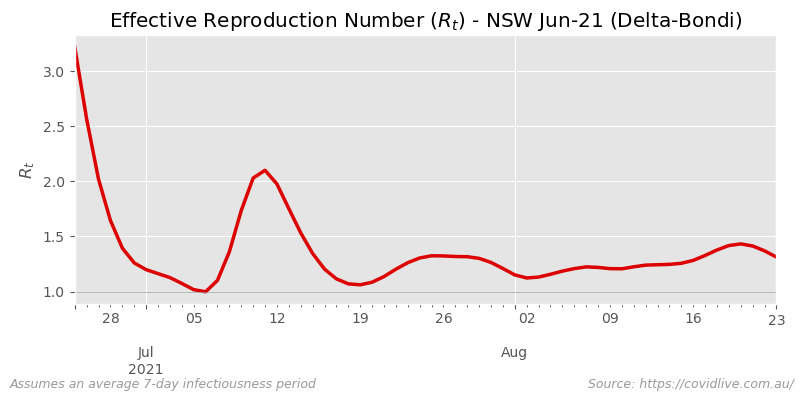

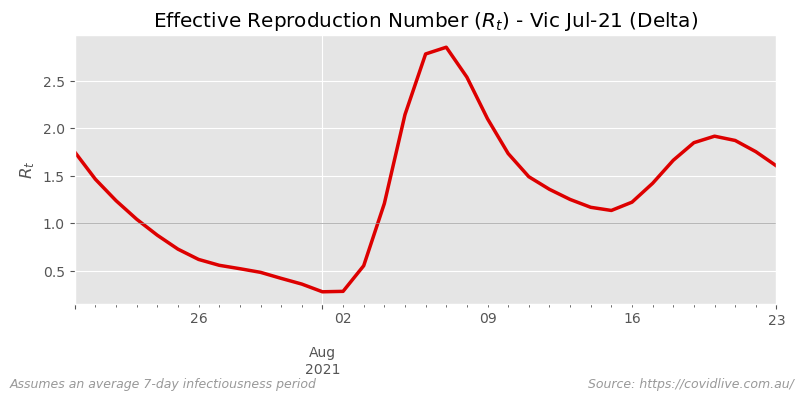

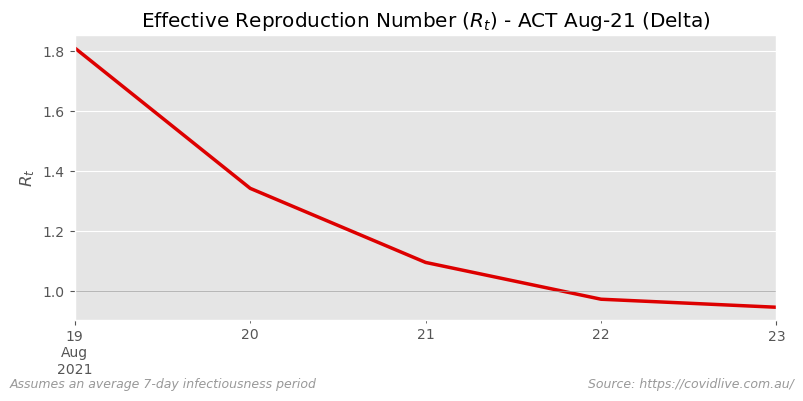

In [49]:
repo_numbers = {}
for name, (state, start, length) in analysis_frame.items():
    
    # calculate
    span = length if length else 120 # days
    s = daily_c[LOCAL][state].dropna()
    s = s[s.index >= pd.Timestamp(start)]
    s = s.iloc[:span]
    ip=7
    R_t = model_effective_reproduction(s, ip)
    if R_t is None:
        continue
    repo_numbers[name] = R_t
    
    # plot
    ax = R_t.plot(lw=2.5, label=name)
    ax.axhline(y=1, color='#999999', lw=0.5, linestyle='-')
    ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            title=f'Effective Reproduction Number ($R_t$) - {name}',
            ylabel='$R_t$',
            xlabel=None,
            rfooter=SOURCE,
            lfooter=f'Assumes an average {ip}-day infectiousness period',
            show=True,
    )


### Comparative $R_t$ and GF

Note that the 5-day on 5-day growth factor is a good proxy for the effective reproduction number (in this case).

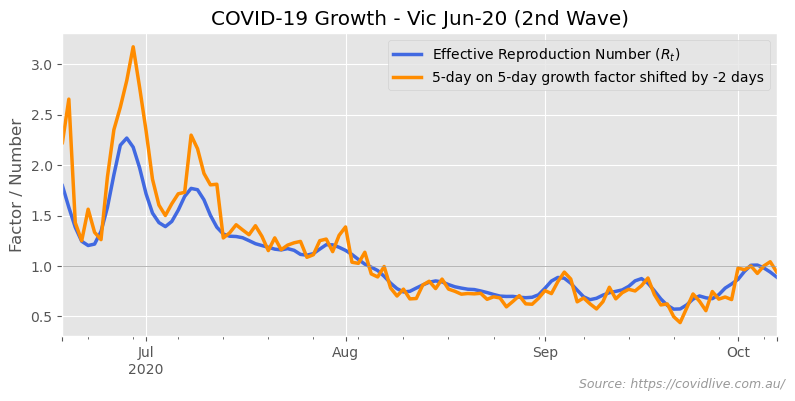

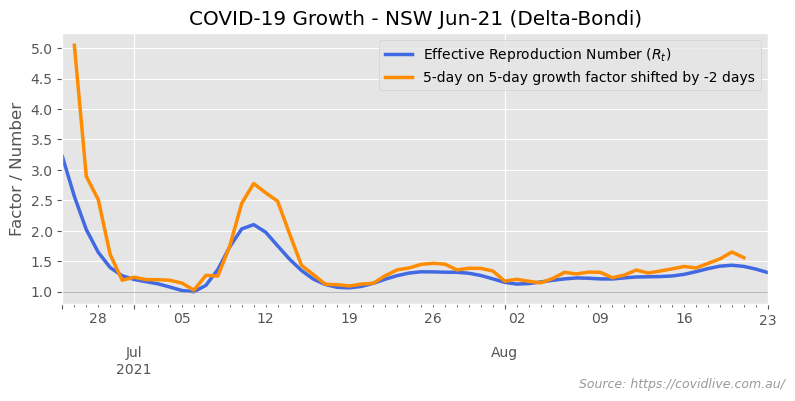

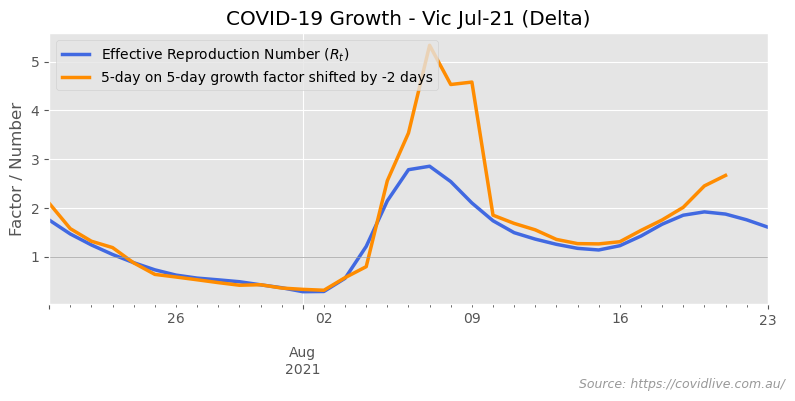

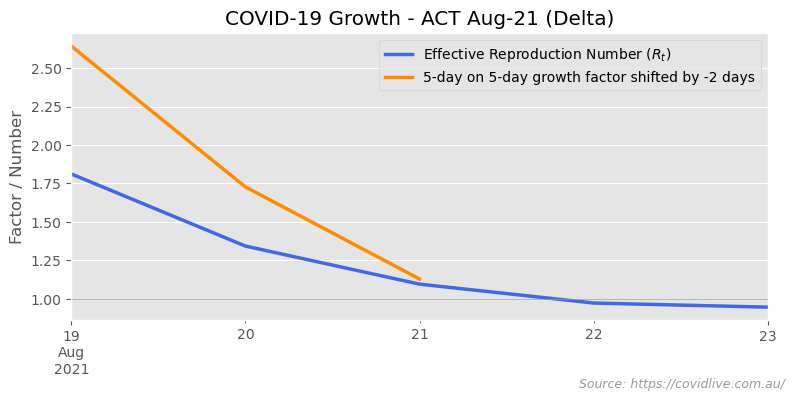

In [50]:
frames = {}
MAX_FACTOR = 6 # used for capping the y axis (None to ignore)
for r, s in repo_numbers.items():
    
    for period in GROWTH_FACTOR_LIST:
        index = f'{r}{period}'
        dict_frame = {}
        rt_label = 'Effective Reproduction Number ($R_t$)'
        dict_frame[rt_label] = s

        if index in gf:
            shift = int(-period // 2) + 1
            shifted = gf[index].shift(shift)
            dict_frame[f'{period}-day on {period}-day growth '
              f'factor shifted by {shift} days'] = shifted
        
        frames[r] = pd.DataFrame(dict_frame).dropna(how='all')
        frames[r] = frames[r][frames[r][rt_label].notna()]
            
    fig, ax = plt.subplots()
    colours = ['#dd0000', 'darkorange', 'royalblue', ]
    for col in frames[r].columns:
        line = frames[r][col].copy()
        if MAX_FACTOR:
            line = line.where(line < MAX_FACTOR, other=np.nan)
        line.plot(lw=2.5, c=colours.pop(), label=col, ax=ax)
    ax.axhline(y=1, lw=0.5, c='#999999')
    ax.legend(loc='best')
    ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            title=f'COVID-19 Growth - {r}',
            ylabel='Factor / Number',
            xlabel=None,
            rfooter=SOURCE,
            show=True,
    )
    

### Short-run projections for local new case growth

In [51]:
def extrapolate(name, state, start, stop):
    """Construct an exponential short-run projection based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""
    
    # projection parameters
    outlook = 15 # projection days
    term = 11 # days - term for henderson moving average
    pperiod = [3, 7,] # most recent days for establishing growth projection
    
    # get current underlying trend
    s = daily_c[LOCAL][state].dropna()
    s = s[s.index >= pd.Timestamp(start)]
    if stop:
        s = s[s.index <= pd.Timestamp(stop)]
    if len(s) <= term: 
        print(f'{name}: insufficient data for a forecast')
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    stop = max(0, s_smoothed[INDEX_CASE])
    projections = {}
    for period in pperiod:
        if period > term: continue
        if period > len(s_smoothed): continue
        start = max(0, s_smoothed[-period])
        if start == 0: continue
        k = np.log(stop/start) / period
        #print(f'start, stop, k: {start, stop, k}')
        projection = np.arange(0, outlook)
        projection = stop * np.exp(projection * k)
        projection = pd.Series(projection, 
                               index = pd.date_range(s.index[INDEX_CASE], 
                                         periods=outlook, freq='D'))
        projection = projection.drop(projection.index[0])
        projections[f'Projection based on last {period} days of smoothed series ~ $y='
                    f'{stop:,.2f}' 'e^{' f'{k:.4f}t' '}$'] = projection
        print(f'{period}: {projection.round(1).to_list()}')
    
    pframe = {'Historic cases': s,
              'Smoothed cases': s_smoothed,
              **projections}
    pframe = pd.DataFrame(pframe)
    

    colours = ['#dd0000', 'darkorange', 'royalblue', 'darkblue']
    lw = [2.5, 1, 2.5, 2.5, 2.5]
    ax=None
    for i, col in enumerate(pframe.columns.to_list()):
        ax = pframe[col].plot(c=colours[i], lw=lw[i], label=col)
    
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                     title=f'Outbreak Projection for {name}',
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     show=True,
                    )


3: [867.2, 896.9, 927.6, 959.4, 992.3, 1026.3, 1061.4, 1097.8, 1135.4, 1174.3, 1214.5, 1256.1, 1299.2, 1343.7]
7: [900.0, 966.0, 1036.9, 1113.1, 1194.7, 1282.4, 1376.6, 1477.6, 1586.0, 1702.4, 1827.4, 1961.5, 2105.5, 2260.0]


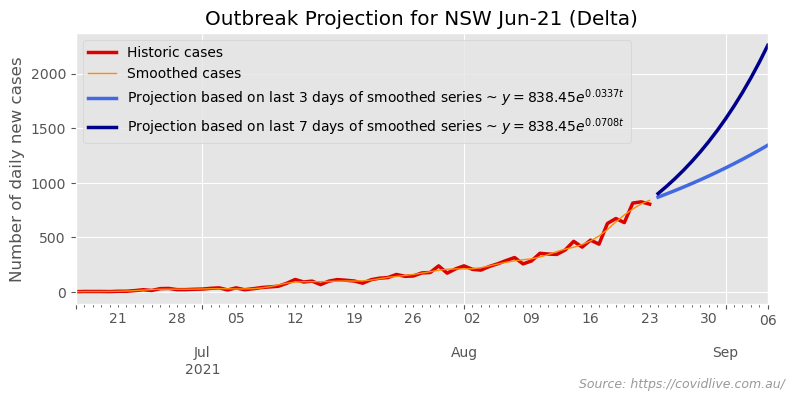

3: [77.4, 82.2, 87.2, 92.5, 98.1, 104.1, 110.5, 117.2, 124.4, 132.0, 140.0, 148.6, 157.6, 167.3]
7: [84.0, 96.6, 111.1, 127.9, 147.1, 169.3, 194.7, 224.1, 257.8, 296.6, 341.2, 392.6, 451.7, 519.6]


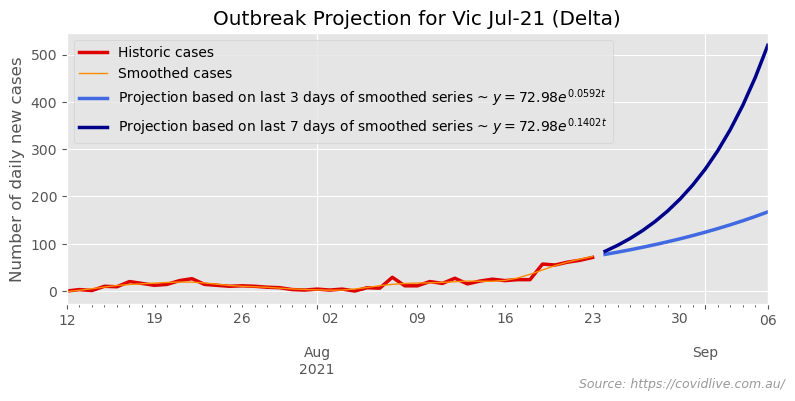

3: [14.4, 14.6, 14.8, 15.1, 15.3, 15.5, 15.8, 16.0, 16.3, 16.5, 16.8, 17.0, 17.3, 17.6]
7: [13.8, 13.5, 13.2, 12.9, 12.6, 12.3, 12.0, 11.7, 11.4, 11.1, 10.9, 10.6, 10.4, 10.1]


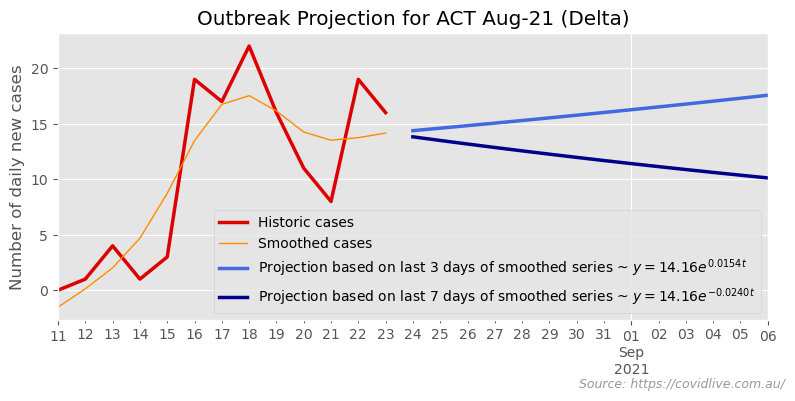

In [52]:
if True:
    
    states = {
        # name                   state         start         stop
        'NSW Jun-21 (Delta)':  ['NSW',        '2021-06-16',  None, ],
        'Vic Jul-21 (Delta)':  ['Victoria',   '2021-07-12',  None, ],
        #'Qld Jul-21 (Delta)':  ['Queensland', '2021-07-29',  None, ], 
        'ACT Aug-21 (Delta)':  ['ACT',        '2021-08-11',  None, ], 
    }

    for name, (state, start, stop) in states.items():
        extrapolate(name, state, start, stop)


## Hospitalised

In [53]:
# set-up
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [54]:
# get data
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']
hospital = {}
for ident, desc in zip(idents, descs):
    data = get_pivot_table(raw_json_data, ident)
    data.index = pd.DatetimeIndex(data.index)
    data = data.dropna(axis=0, how='all')
    hospital[ident] = data

We are missing the latest MED_HOSP_CNT for Australia, SA, WA
We are missing the latest MED_ICU_CNT for Australia, SA, WA
Lastest value less than its predecessor in MED_ICU_CNT for Victoria
We are missing the latest MED_VENT_CNT for Australia, SA, WA


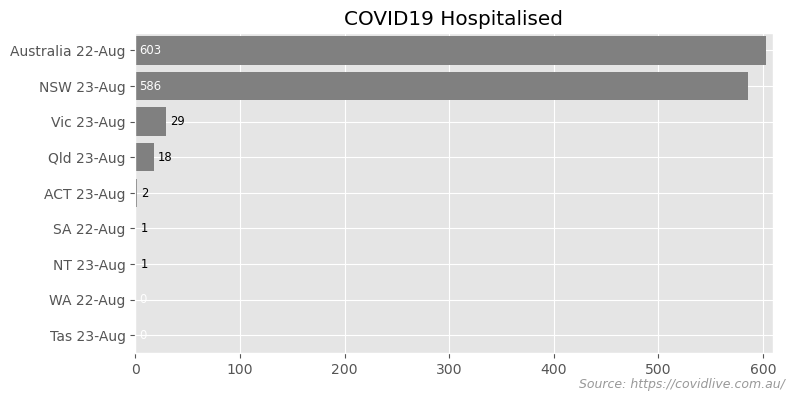

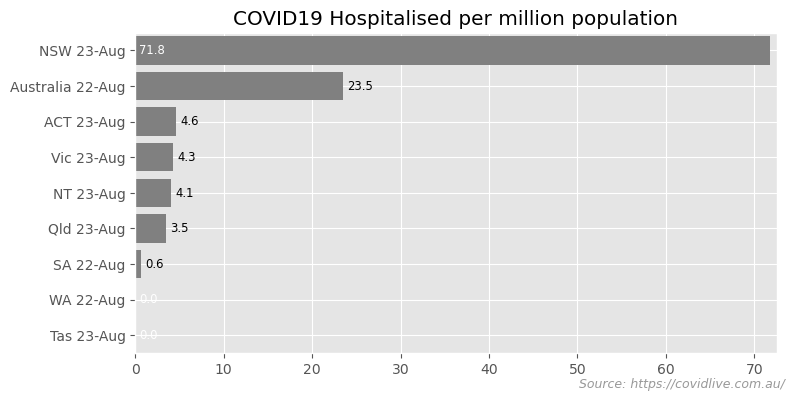

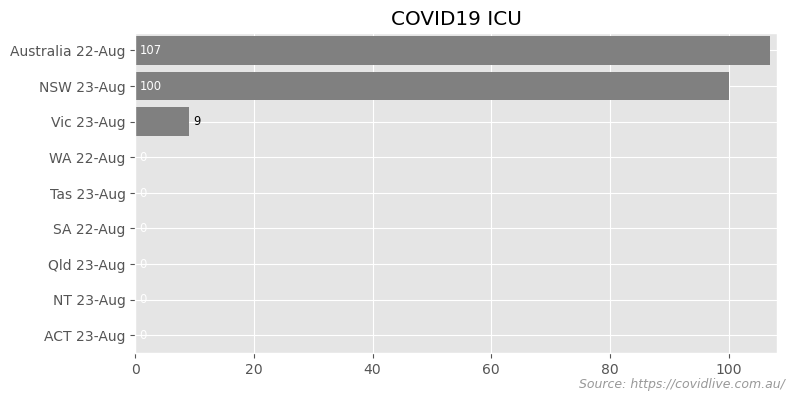

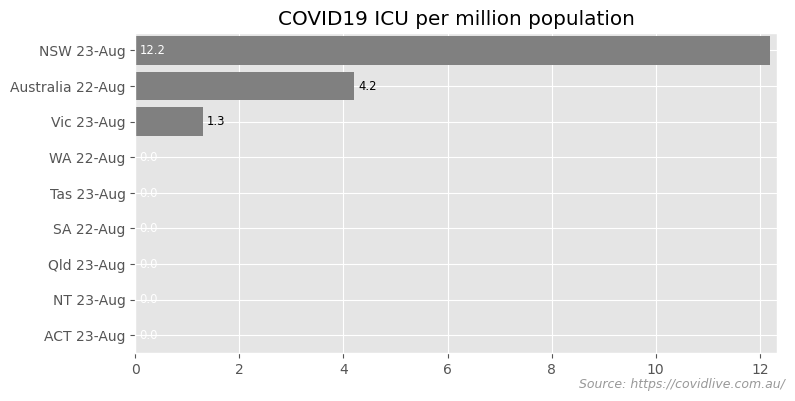

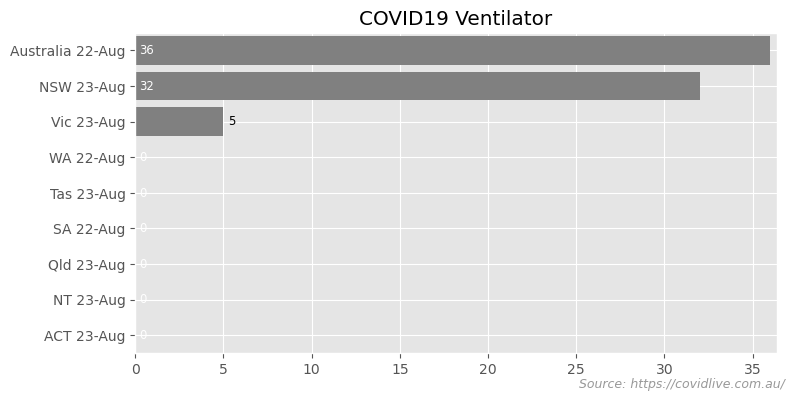

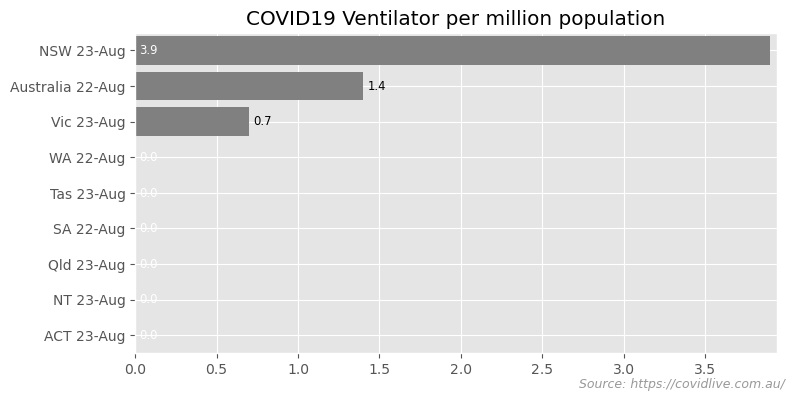

In [55]:
# bar charts
for item, desc in zip(idents, descs):
    two_bar_plots(hospital, item, '', desc)

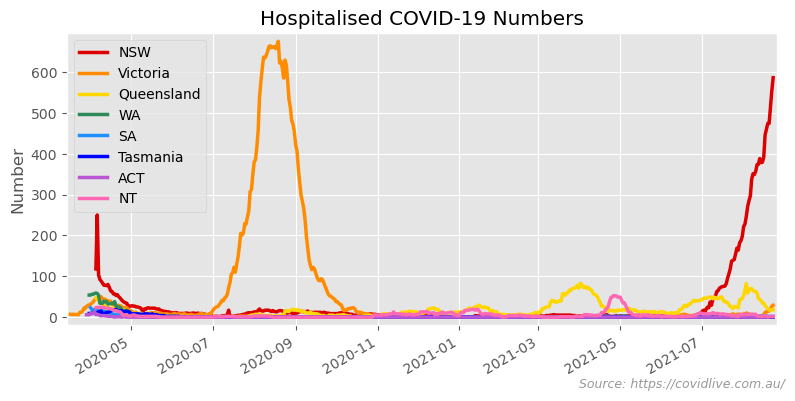

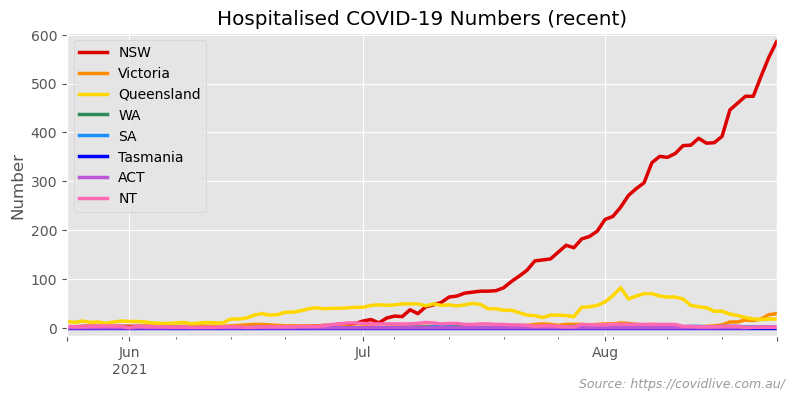

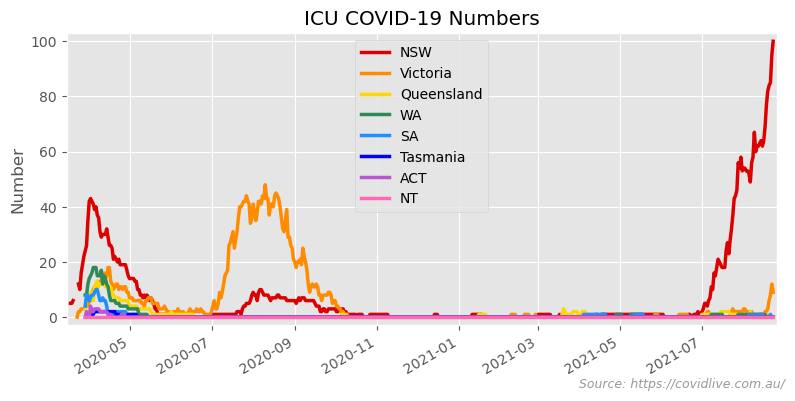

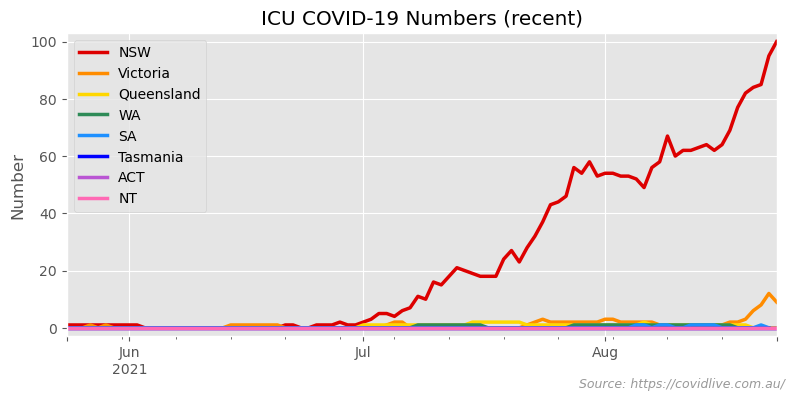

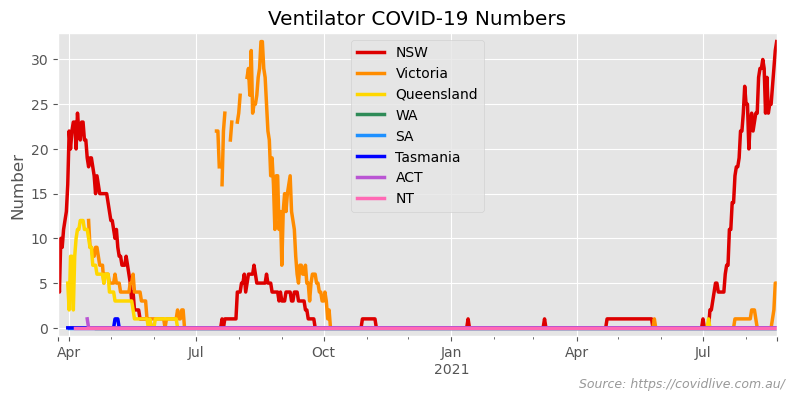

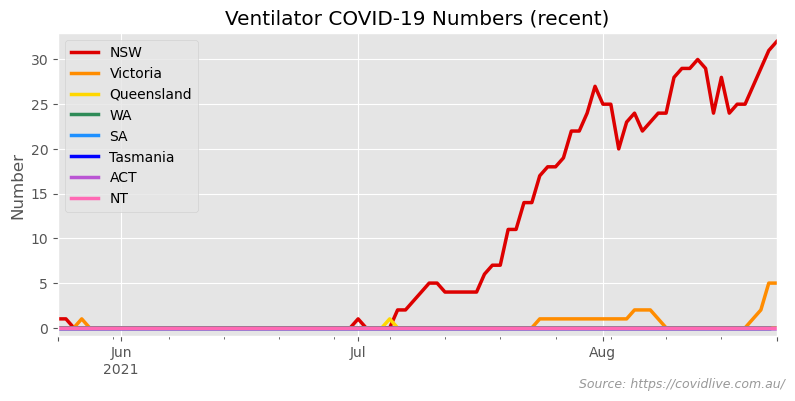

In [56]:
# line charts
for item, desc in zip(idents, descs):
    data = hospital[item]
    line_plots(data, f'{desc} COVID-19 Numbers', 'Number')

## Explore cases to deaths curve

### supporting functions

In [57]:
def get_cases_deaths(state, start, stop):
    
    def _get_data(item, state, start, stop):
        data = (
            daily_c[item][state]
            .dropna() # for NaNs at series end
        )
        data = data[(data.index >= pd.Timestamp(start))
                      & (data.index <= pd.Timestamp(stop))]
        return data
    
    cases = _get_data('CASE_CNT', state, start, stop)
    deaths = _get_data('DEATH_CNT', state, start, stop)
    return cases, deaths

In [58]:
CD_SMOOTHING = 7 

def cd_comparison_plot(raw_cases, raw_deaths, 
                       name, d_shift, rolling=CD_SMOOTHING):
    
    # calculate factor adjusting for the left shift in deaths
    total_cases = raw_cases.iloc[:-d_shift].sum() if d_shift else raw_cases.sum()
    total_deaths = raw_deaths.sum()
    factor = total_cases / total_deaths
    print(f'Factor: {factor}')

    # prepare for plotting
    cases = raw_cases.rolling(rolling).mean()
    deaths = factor * raw_deaths.rolling(rolling).mean().shift(-d_shift)

    suffix = f'{rolling}-day MA'
    deaths_label = f'Deaths * {factor:0.2f} {suffix}'
    if d_shift:
        deaths_label += f'; left-shift: {-d_shift} days'

    # plotting
    ax = (
        pd.DataFrame([cases, deaths], index=[f'Cases {suffix}', deaths_label])
        .dropna(axis=1, how='all')
        .T.plot(lw=2.5)
    )
    title = name + f' - {rolling}-day Moving Ave'
    if d_shift:
        title += '; deaths left shifted'
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'{total_deaths:,.0f} deaths for {total_cases:,.0f} '
                       f'cases (of {raw_cases.sum():,.0f})',
                       ha='left', va='top',
                       fontsize=8, fontstyle='italic',
                       color='#999999')
        
    multiplier = 100
    ps.finalise_plot(ax, 
                     title=title, 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     show=True,)


In [59]:
def get_best_left_shift(raw_cases, raw_deaths, smooth=CD_SMOOTHING):

    # calculate cases to deaths factor 
    # inflate deaths to achieve parity
    deaths = raw_deaths.copy()
    factor = raw_cases.sum() / raw_deaths.sum()
    deaths = deaths * factor
    
    # smooth both series (because they are so noisy)
    cases = raw_cases.rolling(smooth, center=True, min_periods=1).mean()
    deaths = deaths.rolling(smooth, center=True, min_periods=1).mean()
   
    # test a range of possible options and find the best (minimum)
    max_difference = np.inf
    best = None
    results = {}
    for deviation in range(0, 30):
        abs_difference = (cases - deaths.shift(-deviation))
        abs_difference = abs_difference.abs().sum() 
        abs_difference += deaths[:deviation].sum(skipna=True) # correct for left shift loss
        results[deviation] = abs_difference
        if abs_difference < max_difference:
            max_difference = abs_difference
            best = deviation
            
    #print(results)
    return best

### Establish historical baseline

Factor: 23.29338327091136


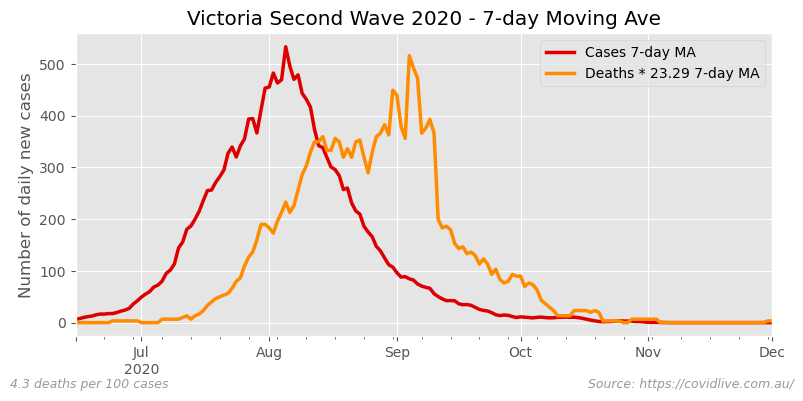

Factor: 23.29338327091136


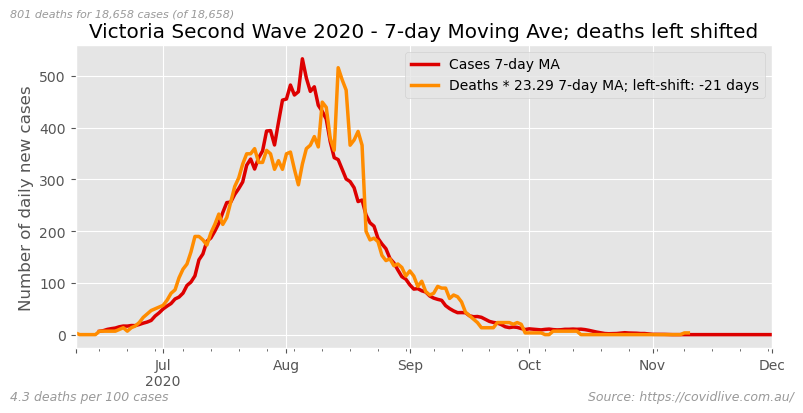

In [60]:
examine = {
        'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-12-01'),
}

for name, (state, start, stop) in examine.items():
    cases, deaths = get_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, 0)
    best_shift = get_best_left_shift(cases, deaths)
    cd_comparison_plot(cases, deaths, name, best_shift)

### Use above baseline to look at the recent Sydney Delta outbreak

Factor: 50.770270270270274


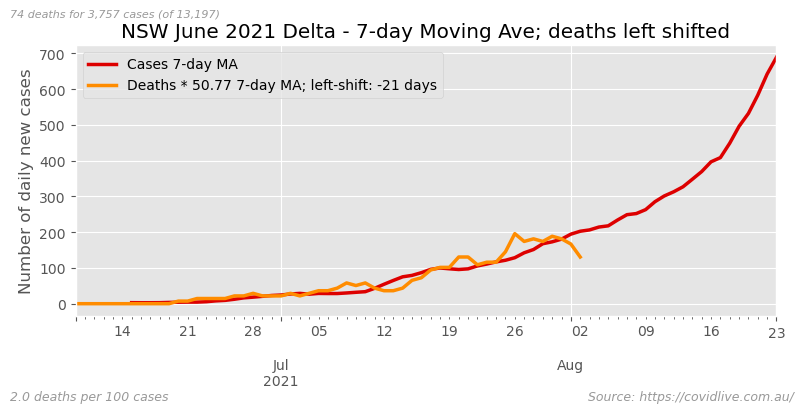

In [61]:
examine = {
        'NSW June 2021 Delta': ('NSW', '2021-06-09', '2021-12-01'),
}

for name, (state, start, stop) in examine.items():
    cases, deaths = get_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, best_shift)

## The End

In [62]:
print_warnings()
print('Finished')

NOTE: 14 warnings
We are missing the latest CASE_CNT for Australia, SA, WA
We are missing the latest DEATH_CNT for Australia, SA, WA
We are missing the latest TEST_CNT for ACT, Australia, SA, WA
We are missing the latest ACTIVE_CNT for Australia, SA, WA
Lastest value less than its predecessor in ACTIVE_CNT for Queensland
We are missing the latest SRC_OVERSEAS_CNT for Australia, SA, WA
We are missing the latest SRC_INTERSTATE_CNT for Australia, SA, WA
We are missing the latest SRC_CONTACT_CNT for Australia, SA, WA
We are missing the latest SRC_UNKNOWN_CNT for Australia, SA, WA
We are missing the latest SRC_INVES_CNT for Australia, SA, WA
We are missing the latest MED_HOSP_CNT for Australia, SA, WA
We are missing the latest MED_ICU_CNT for Australia, SA, WA
Lastest value less than its predecessor in MED_ICU_CNT for Victoria
We are missing the latest MED_VENT_CNT for Australia, SA, WA
Finished
